In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plty
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import catboost as cb

os.chdir('C:\\Users\\BTHANISH\\Documents\\Thanish\\Competition\\Analytics Vidya\\WNS')

# Reading the files and combining the train and test data

In [24]:
train_prod_DF = pd.read_csv('train_LZdllcl.csv')
test_prod_DF = pd.read_csv('test_2umaH9m.csv')

print("The shape of train data is", train_prod_DF.shape)
print("The shape of test data is", test_prod_DF.shape)

test_prod_DF['is_promoted'] = None

train_test_prod = train_prod_DF.append(test_prod_DF)
print("The shape of the combined data is", train_test_prod.shape)

train_test_prod.rename(columns = {'KPIs_met >80%' : 'KPIs_met_grt_80',
                                  'awards_won?' : 'awards_won'}, inplace = True)

train_test_prod.head()
print(train_test_prod.describe())
train_test_prod.tail()

The shape of train data is (54808, 14)
The shape of test data is (23490, 13)
The shape of the combined data is (78298, 14)
        employee_id  no_of_trainings           age  previous_year_rating  \
count  78298.000000     78298.000000  78298.000000          72362.000000   
mean   39149.500000         1.253378     34.797619              3.332219   
std    22602.830026         0.606766      7.665928              1.260982   
min        1.000000         1.000000     20.000000              1.000000   
25%    19575.250000         1.000000     29.000000              3.000000   
50%    39149.500000         1.000000     33.000000              3.000000   
75%    58723.750000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met_grt_80    awards_won  avg_training_score  
count       78298.000000     78298.000000  78298.000000        78298.000000  
mean            5.848974         0.3

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,None
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,None
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,None
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,None
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,None


# Filling the NULL values in factor column

In [25]:
train_test_prod.education = train_test_prod.education.str.replace(" ", "_")
train_test_prod.education = train_test_prod.education.str.replace("'", "")
train_test_prod.education = train_test_prod.education.str.replace("&", "and")

print("Printing the values before imputing the NULL values", train_test_prod.education.isnull().value_counts())
train_test_prod.loc[train_test_prod.education.isnull(), ['education']] = 'Not_sure'

print("Printing the values after imputing the NULL values", train_test_prod.education.isnull().value_counts())

Printing the values before imputing the NULL values False    74855
True      3443
Name: education, dtype: int64
Printing the values after imputing the NULL values False    78298
Name: education, dtype: int64


# Filling the NULL values in integer column

In [26]:
train_test_prod.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below_Secondary,m,sourcing,1,24,3.0,1,0,0,61,None
23486,25600,Technology,region_25,Bachelors,m,sourcing,1,31,3.0,7,0,0,74,None
23487,45409,HR,region_16,Bachelors,f,sourcing,1,26,4.0,4,0,0,50,None
23488,1186,Procurement,region_31,Bachelors,m,sourcing,3,27,NaN,1,0,0,70,None
23489,5973,Technology,region_17,Masters_and_above,m,other,3,40,5.0,5,1,0,89,None


In [27]:
train_test_prod.fillna(-999, inplace = True)
#print(train_test_prod.describe())
train_test_prod.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below_Secondary,m,sourcing,1,24,3.0,1,0,0,61,-999
23486,25600,Technology,region_25,Bachelors,m,sourcing,1,31,3.0,7,0,0,74,-999
23487,45409,HR,region_16,Bachelors,f,sourcing,1,26,4.0,4,0,0,50,-999
23488,1186,Procurement,region_31,Bachelors,m,sourcing,3,27,-999.0,1,0,0,70,-999
23489,5973,Technology,region_17,Masters_and_above,m,other,3,40,5.0,5,1,0,89,-999


# Label encode the categorical variables

In [28]:
cols_2_encode = train_test_prod.columns[train_test_prod.dtypes == 'object']
cols_2_encode = cols_2_encode.difference(['region'])
print("columns to encode", cols_2_encode)

le = LabelEncoder()
train_test_prod.loc[:, cols_2_encode] = train_test_prod.loc[:, cols_2_encode].apply(lambda x : le.fit_transform(x))
train_test_prod.tail()

columns to encode Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
23485,53478,3,region_2,1,1,2,1,24,3.0,1,0,0,61,-999
23486,25600,8,region_25,0,1,2,1,31,3.0,7,0,0,74,-999
23487,45409,2,region_16,0,0,2,1,26,4.0,4,0,0,50,-999
23488,1186,5,region_31,0,1,2,3,27,-999.0,1,0,0,70,-999
23489,5973,8,region_17,2,1,0,3,40,5.0,5,1,0,89,-999


# Feature enigneering
   # Extract the region number from region

In [29]:
train_test_prod['region'] = train_test_prod['region'].str.replace("region_", "").astype('int')
train_test_prod.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted
0,65438,7,7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,22,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,19,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,23,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,26,0,1,0,1,45,3.0,2,0,0,73,0


# Feature enigneering

    # Training score per training
    # % time spent in the company

In [30]:
train_test_prod['score_per_training'] = train_test_prod['avg_training_score']/train_test_prod['no_of_trainings']
train_test_prod['per_age_in_this_company'] = train_test_prod['length_of_service']/train_test_prod['age']
train_test_prod['Rating_per_service'] = train_test_prod['previous_year_rating']/train_test_prod['length_of_service']

train_test_prod.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service
0,65438,7,7,2,0,2,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000
1,65141,4,22,0,1,0,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000
2,7513,7,19,0,1,2,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571
3,2542,7,23,0,1,0,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000
4,48945,8,26,0,1,0,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000


# Splitting back to prod train and test

In [31]:
train_prod = train_test_prod.loc[train_test_prod.is_promoted != -999, ]
test_prod = train_test_prod.loc[train_test_prod.is_promoted == -999, ]

print("The shape of train_prod", train_prod.shape)
print("The shape of test_prod", test_prod.shape)

sub_id = test_prod.employee_id

train_prod.drop(['employee_id'], axis = 1, inplace = True)
test_prod.drop(['employee_id'], axis = 1, inplace = True)

train_prod.head()

The shape of train_prod (54808, 17)
The shape of test_prod (23490, 17)


C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service
0,7,7,2,0,2,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000
1,4,22,0,1,0,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000
2,7,19,0,1,2,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571
3,7,23,0,1,0,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000
4,8,26,0,1,0,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000


# Find all the categorical columns

In [32]:
#train_prod.dtypes
cat_columns = train_prod.select_dtypes(include = ['object']).columns.tolist()
cat_columns

[]

# Kmeans cluster

In [33]:

train_prod_cluster = train_prod.copy()
test_prod_cluster = test_prod.copy()

#Scaling the features
cols_2_use_and_scale = train_prod_cluster.columns.difference(['is_promoted'])
scaler = MinMaxScaler()
scaler.fit(train_prod_cluster.loc[:,cols_2_use_and_scale])

#Scaling the train and test prod
train_prod_cluster.loc[:,cols_2_use_and_scale] = scaler.transform(train_prod_cluster.loc[:,cols_2_use_and_scale])
test_prod_cluster[cols_2_use_and_scale] = scaler.transform(test_prod_cluster[cols_2_use_and_scale])

#Fit the model on the train prod
np.random.seed(100)
clus = KMeans(n_clusters= 25, random_state= 123)

#train_prod_cluster.drop(['cluster'], axis = 1, inplace = True)
#test_prod_cluster.drop(['cluster'], axis = 1, inplace = True)

clus.fit(X=train_prod_cluster[cols_2_use_and_scale])

train_prod['cluster'] = clus.labels_

#Predict on the test prod
test_prod['cluster'] = clus.predict(test_prod_cluster[cols_2_use_and_scale])


C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
print(train_prod.groupby(['cluster']).agg({'is_promoted':['count', 'mean']}))
print(test_prod.groupby(['cluster']).agg({'is_promoted':['count', 'mean']}))

        is_promoted          
              count      mean
cluster                      
0              1525  0.183607
1              3512  0.029897
2              1817  0.040726
3              1844  0.187636
4              1343  0.055101
5              3272  0.168399
6              3216  0.038868
7              1158  0.079447
8              1178  0.134126
9              1469  0.059905
10             1886  0.060445
11             3880  0.037371
12             2498  0.168135
13             3576  0.041667
14              882  0.043084
15             1060  0.171698
16             2648  0.040408
17             3961  0.039636
18             2525  0.025347
19             1061  0.033930
20              975  0.161026
21             1023  0.169110
22             2745  0.167213
23             3002  0.034310
24             2752  0.171148
        is_promoted     
              count mean
cluster                 
0               655 -999
1              1505 -999
2               780 -999
3         

# Feature engineering

In [35]:
trian_rating_service_group = train_prod.groupby(['previous_year_rating', 'Rating_per_service']).agg({'is_promoted':['sum', 'count']}).reset_index()
trian_rating_service_group.columns = ['previous_year_rating',
                                      'Rating_per_service',
                                      'is_promoted_sum', 'record_count']
trian_rating_service_group['promoted_ratio'] = trian_rating_service_group['is_promoted_sum']/trian_rating_service_group['record_count']
trian_rating_service_group

train_prod = pd.merge(train_prod, 
                      trian_rating_service_group[['previous_year_rating','Rating_per_service', 'promoted_ratio']], 
                      how = 'left',
                      on = ['previous_year_rating','Rating_per_service'])

test_prod = pd.merge(test_prod, 
                     trian_rating_service_group[['previous_year_rating','Rating_per_service', 'promoted_ratio']], 
                     how = 'left',
                     on = ['previous_year_rating','Rating_per_service'])

In [36]:
train_prod.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_grt_80,awards_won,avg_training_score,is_promoted,score_per_training,per_age_in_this_company,Rating_per_service,cluster,promoted_ratio
0,7,7,2,0,2,1,35,5.0,8,1,0,49,0,49.0,0.228571,0.625000,12,0.182720
1,4,22,0,1,0,1,30,5.0,4,0,0,60,0,60.0,0.133333,1.250000,1,0.167296
2,7,19,0,1,2,1,34,3.0,7,0,0,50,0,50.0,0.205882,0.428571,18,0.074437
3,7,23,0,1,0,2,39,1.0,10,0,0,50,0,25.0,0.256410,0.100000,1,0.025180
4,8,26,0,1,0,1,45,3.0,2,0,0,73,0,73.0,0.044444,1.500000,1,0.074394


# Splitting to local train and test

In [39]:
dep = 'is_promoted'
indep = train_prod.columns.difference([dep])
print("The indep columns are ", indep)

train_prod_X = train_prod[indep]
train_prod_Y = train_prod[dep]
test_prod_X = test_prod[indep]
    
np.random.seed(100)
X_train_local, X_test_local, Y_train_local, Y_test_local = train_test_split(train_prod_X,
                                                                            train_prod_Y,
                                                                            test_size = 0.7,
                                                                            stratify = train_prod[dep]
                                                                            )

print("The shape of X train", X_train_local.shape) 
print("The shape of Y train", Y_train_local.shape)
print("The shape of X test",X_test_local.shape)
print("The shape of Y test", Y_test_local.shape )

The indep columns are  Index(['KPIs_met_grt_80', 'Rating_per_service', 'age', 'avg_training_score',
       'awards_won', 'cluster', 'department', 'education', 'gender',
       'length_of_service', 'no_of_trainings', 'per_age_in_this_company',
       'previous_year_rating', 'promoted_ratio', 'recruitment_channel',
       'region', 'score_per_training'],
      dtype='object')
The shape of X train (16442, 17)
The shape of Y train (16442,)
The shape of X test (38366, 17)
The shape of Y test (38366,)


# LGBM cross validation

In [43]:
train_prod_X.dtypes

KPIs_met_grt_80              int64
Rating_per_service         float64
age                          int64
avg_training_score           int64
awards_won                   int64
cluster                      int32
department                   int64
education                    int64
gender                       int64
length_of_service            int64
no_of_trainings              int64
per_age_in_this_company    float64
previous_year_rating       float64
promoted_ratio             float64
recruitment_channel          int64
region                       int32
score_per_training         float64
dtype: object

In [45]:
lg = lgb.LGBMClassifier(silent=False)

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = (labels>0.3).astype(int)
    preds  = (preds>0.3).astype(int)
    #print(labels)
    #print(preds)
    f_score = f1_score(preds, labels , average = 'binary')
    return 'f1_score', f_score, True

params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          #'metric': 'binary_logloss',
          'num_leaves': 60,
          'max_depth' : 8,
          'learning_rate': 0.05,
          #'feature_fraction': 0.9,
          #'bagging_fraction': 0.9,
          'bagging_freq': 5,
          'verbose': 1
         }
np.random.seed(100)
# create dataset for lightgbm
lgb_train_prod = lgb.Dataset(train_prod_X, train_prod_Y
                             #feature_name = train_prod_X.columns.tolist(),
                             ,categorical_feature = cat_columns
                            )

# specify your configurations as a dict
nrounds = 1000

print('Start training...')
# train
lgbm_local = lgb.cv(params,
                    lgb_train_prod,
                    nfold = 5,
                    num_boost_round = nrounds,
                    feval = evalerror,
                    verbose_eval = 1,
                    #valid_sets=lgb_valid_local,
                    early_stopping_rounds = 20)

error_array = np.array(lgbm_local['f1_score-mean'])
best_error = error_array.max()

print("")
print("The best error", best_error)
print("The best iteration" , np.where(error_array == best_error))

#pd.DataFrame({'Features' : indep, 'Importance' : lgbm_local.feature_importance()}).sort_values(['Importance'])

Start training...
[1]	cv_agg's binary_logloss: 0.655491 + 0.000120806	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.621407 + 0.000227555	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.590353 + 0.000411236	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.562132 + 0.000608874	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.536284 + 0.000806522	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.512557 + 0.001207	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.490668 + 0.00155558	cv_agg's f1_score: 0.156971 + 6.94418e-05
[8]	cv_agg's binary_logloss: 0.470594 + 0.00188916	cv_agg's f1_score: 0.156971 + 6.94418e-05
[9]	cv_agg's binary_logloss: 0.451837 + 0.00209231	cv_agg's f1_score: 0.156971 + 6.94418e-05
[10]	cv_agg's binary_logloss: 0.434463 + 0.00207934	cv_agg's f1_score: 0.156971 + 6.94418e-05
[11]	cv_agg's binary_logloss: 0.418507 + 0.00209

[97]	cv_agg's binary_logloss: 0.168845 + 0.00435942	cv_agg's f1_score: 0.514272 + 0.0162041
[98]	cv_agg's binary_logloss: 0.168674 + 0.00435702	cv_agg's f1_score: 0.514111 + 0.0164698
[99]	cv_agg's binary_logloss: 0.168543 + 0.00439073	cv_agg's f1_score: 0.514113 + 0.0155644
[100]	cv_agg's binary_logloss: 0.168359 + 0.00439337	cv_agg's f1_score: 0.514026 + 0.0160577
[101]	cv_agg's binary_logloss: 0.168243 + 0.00441614	cv_agg's f1_score: 0.513808 + 0.0157463
[102]	cv_agg's binary_logloss: 0.168112 + 0.00446208	cv_agg's f1_score: 0.513505 + 0.0158153
[103]	cv_agg's binary_logloss: 0.16795 + 0.00447501	cv_agg's f1_score: 0.513135 + 0.0157707
[104]	cv_agg's binary_logloss: 0.16782 + 0.00440782	cv_agg's f1_score: 0.513983 + 0.0154644
[105]	cv_agg's binary_logloss: 0.167719 + 0.00435539	cv_agg's f1_score: 0.514124 + 0.0149055
[106]	cv_agg's binary_logloss: 0.167573 + 0.00434981	cv_agg's f1_score: 0.513905 + 0.014036
[107]	cv_agg's binary_logloss: 0.167497 + 0.0043764	cv_agg's f1_score: 0.513

# LGBM Grid search -II

In [55]:
#XGBoost
lgb_train_prod = lgb.Dataset(train_prod_X, train_prod_Y
                            ,categorical_feature = cat_columns,
                            free_raw_data=False )

#Cross validation
depth_search = [3, 4, 5]
eta_search = [0.08, 0.09, 0.1, 1.1]
subsample_search = [0.7, 0.8, 0.9, 1]
colsample_search = [0.8, 0.9, 1]


def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = (labels>0.3).astype(int)
    preds  = (preds>0.3).astype(int)
    #print(labels)
    #print(preds)
    f_score = f1_score(preds, labels , average = 'binary')
    return 'f1_score', f_score, True


best_iteration = []
best_auc = []
best_depth = []
best_LR = []
best_sub_samp = []
best_col_samp = []

model_count = len(depth_search) * len(eta_search)  * len(subsample_search) * len(colsample_search)
count = 0
num_round = 1000

for depth in depth_search :
    for LR in eta_search :
        for sub_samp in subsample_search :
            for col_samp in colsample_search :
                
                print("Model", count, "out of", model_count) 
                params = {'boosting_type': 'gbdt',
                          'objective': 'binary',
                          #'metric': 'binary_logloss',
                          'num_leaves': 2**depth,
                          'max_depth' : depth,
                          'learning_rate': LR,
                          'feature_fraction': col_samp,
                          'bagging_fraction': sub_samp,
                          #'bagging_freq': 5,
                          'verbose': 1
                         }
                
                #Cross validation
                np.random.seed(100)
                lgbm_local = lgb.cv(params,
                                    lgb_train_prod,
                                    nfold = 5,
                                    num_boost_round = nrounds,
                                    feval = evalerror,
                                    verbose_eval = 1,
                                    #valid_sets=lgb_valid_local,
                                    early_stopping_rounds = 20)
                
                error_array = np.array(lgbm_local['f1_score-mean'])
                
                best_valid_score = error_array.max()
                best_round = np.where(error_array == best_valid_score)
                best_round = best_round[0].tolist()[0]
                
                print("Model", count, "out of", model_count, "Best round", best_round, "Score", best_valid_score) 
                    
                best_iteration.append(best_round)                
                best_auc.append(best_valid_score)
                best_depth.append(depth)
                best_LR.append(LR)
                best_sub_samp.append(sub_samp)
                best_col_samp.append(col_samp)
                
                count += 1

cv_DF = pd.DataFrame({'iter' : best_iteration,
                      'depth' : best_depth,
                      'LR' : best_LR,
                      'sub_samp' : best_sub_samp,
                      'col_samp' : best_col_samp,
                      'Auc' : best_auc})

cv_DF.loc[cv_DF['Auc'] == cv_DF['Auc'].max(),:]           


Model 0 out of 144
[1]	cv_agg's binary_logloss: 0.636753 + 0.000256454	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.589046 + 0.000429232	cv_agg's f1_score: 0.156971 + 6.94418e-05


C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning:

Using categorical_feature in Dataset.



[3]	cv_agg's binary_logloss: 0.547547 + 0.000653886	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.511811 + 0.000839271	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.48046 + 0.000978658	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.452962 + 0.00114401	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.428829 + 0.00134654	cv_agg's f1_score: 0.278692 + 0.00617963
[8]	cv_agg's binary_logloss: 0.407757 + 0.00148377	cv_agg's f1_score: 0.308988 + 0.00286025
[9]	cv_agg's binary_logloss: 0.389175 + 0.00156735	cv_agg's f1_score: 0.313508 + 0.0165804
[10]	cv_agg's binary_logloss: 0.372169 + 0.00170137	cv_agg's f1_score: 0.322335 + 0.0168456
[11]	cv_agg's binary_logloss: 0.35706 + 0.00183421	cv_agg's f1_score: 0.325041 + 0.016229
[12]	cv_agg's binary_logloss: 0.343594 + 0.00196171	cv_agg's f1_score: 0.312777 + 0.0268912
[13]	cv_agg's binary_logloss: 0.331445 + 0.00203788	cv_agg's f1_score: 0.3071

Model 2 out of 144 Best round 9 Score 0.32191061669
Model 3 out of 144
[1]	cv_agg's binary_logloss: 0.636753 + 0.000256454	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.589046 + 0.000429232	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.547547 + 0.000653886	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.511811 + 0.000839271	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.48046 + 0.000978658	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.452962 + 0.00114401	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.428829 + 0.00134654	cv_agg's f1_score: 0.278692 + 0.00617963
[8]	cv_agg's binary_logloss: 0.407757 + 0.00148377	cv_agg's f1_score: 0.308988 + 0.00286025
[9]	cv_agg's binary_logloss: 0.389175 + 0.00156735	cv_agg's f1_score: 0.313508 + 0.0165804
[10]	cv_agg's binary_logloss: 0.372169 + 0.00170137	cv_agg's f1_score: 0.322335 + 0.0168456


Model 5 out of 144 Best round 9 Score 0.32191061669
Model 6 out of 144
[1]	cv_agg's binary_logloss: 0.636753 + 0.000256454	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.589046 + 0.000429232	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.547547 + 0.000653886	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.511811 + 0.000839271	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.48046 + 0.000978658	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.452962 + 0.00114401	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.428829 + 0.00134654	cv_agg's f1_score: 0.278692 + 0.00617963
[8]	cv_agg's binary_logloss: 0.407757 + 0.00148377	cv_agg's f1_score: 0.308988 + 0.00286025
[9]	cv_agg's binary_logloss: 0.389175 + 0.00156735	cv_agg's f1_score: 0.313508 + 0.0165804
[10]	cv_agg's binary_logloss: 0.372169 + 0.00170137	cv_agg's f1_score: 0.322335 + 0.0168456


[1]	cv_agg's binary_logloss: 0.636753 + 0.000256454	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.589046 + 0.000429232	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.547547 + 0.000653886	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.511811 + 0.000839271	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.48046 + 0.000978658	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.452962 + 0.00114401	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.428829 + 0.00134654	cv_agg's f1_score: 0.278692 + 0.00617963
[8]	cv_agg's binary_logloss: 0.407757 + 0.00148377	cv_agg's f1_score: 0.308988 + 0.00286025
[9]	cv_agg's binary_logloss: 0.389175 + 0.00156735	cv_agg's f1_score: 0.313508 + 0.0165804
[10]	cv_agg's binary_logloss: 0.372169 + 0.00170137	cv_agg's f1_score: 0.322335 + 0.0168456
[11]	cv_agg's binary_logloss: 0.35706 + 0.00183421	cv_agg's f1_score: 0

[30]	cv_agg's binary_logloss: 0.239114 + 0.00249682	cv_agg's f1_score: 0.279928 + 0.0238231
Model 11 out of 144 Best round 9 Score 0.32191061669
Model 12 out of 144
[1]	cv_agg's binary_logloss: 0.630033 + 0.000287607	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.577729 + 0.000462972	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.532953 + 0.000691839	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.495089 + 0.000909194	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.462321 + 0.00108171	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.434018 + 0.00130951	cv_agg's f1_score: 0.20023 + 0.0148179
[7]	cv_agg's binary_logloss: 0.40945 + 0.00146108	cv_agg's f1_score: 0.303671 + 0.0100761
[8]	cv_agg's binary_logloss: 0.388295 + 0.00163313	cv_agg's f1_score: 0.319947 + 0.0179022
[9]	cv_agg's binary_logloss: 0.369938 + 0.00174927	cv_agg's f1_score: 0.325043 + 0.0169618
[10]

[1]	cv_agg's binary_logloss: 0.630033 + 0.000287607	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.577729 + 0.000462972	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.532953 + 0.000691839	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.495089 + 0.000909194	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.462321 + 0.00108171	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.434018 + 0.00130951	cv_agg's f1_score: 0.20023 + 0.0148179
[7]	cv_agg's binary_logloss: 0.40945 + 0.00146108	cv_agg's f1_score: 0.303671 + 0.0100761
[8]	cv_agg's binary_logloss: 0.388295 + 0.00163313	cv_agg's f1_score: 0.319947 + 0.0179022
[9]	cv_agg's binary_logloss: 0.369938 + 0.00174927	cv_agg's f1_score: 0.325043 + 0.0169618
[10]	cv_agg's binary_logloss: 0.353268 + 0.00190194	cv_agg's f1_score: 0.317882 + 0.0208919
[11]	cv_agg's binary_logloss: 0.338658 + 0.00204712	cv_agg's f1_score: 0.3076

[6]	cv_agg's binary_logloss: 0.434018 + 0.00130951	cv_agg's f1_score: 0.20023 + 0.0148179
[7]	cv_agg's binary_logloss: 0.40945 + 0.00146108	cv_agg's f1_score: 0.303671 + 0.0100761
[8]	cv_agg's binary_logloss: 0.388295 + 0.00163313	cv_agg's f1_score: 0.319947 + 0.0179022
[9]	cv_agg's binary_logloss: 0.369938 + 0.00174927	cv_agg's f1_score: 0.325043 + 0.0169618
[10]	cv_agg's binary_logloss: 0.353268 + 0.00190194	cv_agg's f1_score: 0.317882 + 0.0208919
[11]	cv_agg's binary_logloss: 0.338658 + 0.00204712	cv_agg's f1_score: 0.307602 + 0.0268052
[12]	cv_agg's binary_logloss: 0.325562 + 0.00225703	cv_agg's f1_score: 0.308475 + 0.0257004
[13]	cv_agg's binary_logloss: 0.314078 + 0.00231406	cv_agg's f1_score: 0.304917 + 0.0273845
[14]	cv_agg's binary_logloss: 0.303705 + 0.00234119	cv_agg's f1_score: 0.303288 + 0.0250392
[15]	cv_agg's binary_logloss: 0.294535 + 0.00234389	cv_agg's f1_score: 0.300237 + 0.0213744
[16]	cv_agg's binary_logloss: 0.286379 + 0.00233665	cv_agg's f1_score: 0.294314 + 0.02

[11]	cv_agg's binary_logloss: 0.338658 + 0.00204712	cv_agg's f1_score: 0.307602 + 0.0268052
[12]	cv_agg's binary_logloss: 0.325562 + 0.00225703	cv_agg's f1_score: 0.308475 + 0.0257004
[13]	cv_agg's binary_logloss: 0.314078 + 0.00231406	cv_agg's f1_score: 0.304917 + 0.0273845
[14]	cv_agg's binary_logloss: 0.303705 + 0.00234119	cv_agg's f1_score: 0.303288 + 0.0250392
[15]	cv_agg's binary_logloss: 0.294535 + 0.00234389	cv_agg's f1_score: 0.300237 + 0.0213744
[16]	cv_agg's binary_logloss: 0.286379 + 0.00233665	cv_agg's f1_score: 0.294314 + 0.020628
[17]	cv_agg's binary_logloss: 0.279806 + 0.00239872	cv_agg's f1_score: 0.29525 + 0.0210228
[18]	cv_agg's binary_logloss: 0.273328 + 0.00243327	cv_agg's f1_score: 0.28762 + 0.0210352
[19]	cv_agg's binary_logloss: 0.268011 + 0.00249714	cv_agg's f1_score: 0.286188 + 0.0208636
[20]	cv_agg's binary_logloss: 0.263023 + 0.0025891	cv_agg's f1_score: 0.28693 + 0.0203902
[21]	cv_agg's binary_logloss: 0.258946 + 0.00257242	cv_agg's f1_score: 0.284692 + 0.0

[16]	cv_agg's binary_logloss: 0.274039 + 0.00235474	cv_agg's f1_score: 0.286793 + 0.0199325
[17]	cv_agg's binary_logloss: 0.268241 + 0.00244935	cv_agg's f1_score: 0.291824 + 0.019878
[18]	cv_agg's binary_logloss: 0.262446 + 0.0024931	cv_agg's f1_score: 0.287261 + 0.0192297
[19]	cv_agg's binary_logloss: 0.257873 + 0.00247087	cv_agg's f1_score: 0.282527 + 0.0189971
[20]	cv_agg's binary_logloss: 0.253521 + 0.00253074	cv_agg's f1_score: 0.284446 + 0.0216566
[21]	cv_agg's binary_logloss: 0.250022 + 0.00252237	cv_agg's f1_score: 0.285158 + 0.0206706
[22]	cv_agg's binary_logloss: 0.246362 + 0.00253622	cv_agg's f1_score: 0.280339 + 0.0206972
[23]	cv_agg's binary_logloss: 0.243097 + 0.00253474	cv_agg's f1_score: 0.280256 + 0.0186746
[24]	cv_agg's binary_logloss: 0.240324 + 0.002561	cv_agg's f1_score: 0.280214 + 0.0185079
[25]	cv_agg's binary_logloss: 0.238279 + 0.00257142	cv_agg's f1_score: 0.281087 + 0.0193466
[26]	cv_agg's binary_logloss: 0.235916 + 0.00254007	cv_agg's f1_score: 0.280496 + 0.

[22]	cv_agg's binary_logloss: 0.246362 + 0.00253622	cv_agg's f1_score: 0.280339 + 0.0206972
[23]	cv_agg's binary_logloss: 0.243097 + 0.00253474	cv_agg's f1_score: 0.280256 + 0.0186746
[24]	cv_agg's binary_logloss: 0.240324 + 0.002561	cv_agg's f1_score: 0.280214 + 0.0185079
[25]	cv_agg's binary_logloss: 0.238279 + 0.00257142	cv_agg's f1_score: 0.281087 + 0.0193466
[26]	cv_agg's binary_logloss: 0.235916 + 0.00254007	cv_agg's f1_score: 0.280496 + 0.0212319
[27]	cv_agg's binary_logloss: 0.233835 + 0.00250643	cv_agg's f1_score: 0.279231 + 0.0199093
[28]	cv_agg's binary_logloss: 0.232405 + 0.00251442	cv_agg's f1_score: 0.280189 + 0.0197785
Model 27 out of 144 Best round 7 Score 0.326097440714
Model 28 out of 144
[1]	cv_agg's binary_logloss: 0.623144 + 0.000349228	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.566328 + 0.000668894	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.518793 + 0.0008847	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	

[1]	cv_agg's binary_logloss: 0.623144 + 0.000349228	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.566328 + 0.000668894	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.518793 + 0.0008847	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.478798 + 0.00111429	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.445 + 0.00132908	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.416291 + 0.00149333	cv_agg's f1_score: 0.295517 + 0.00551506
[7]	cv_agg's binary_logloss: 0.391455 + 0.00167131	cv_agg's f1_score: 0.297515 + 0.00631914
[8]	cv_agg's binary_logloss: 0.370022 + 0.00198415	cv_agg's f1_score: 0.326257 + 0.0138465
[9]	cv_agg's binary_logloss: 0.351252 + 0.00190113	cv_agg's f1_score: 0.308021 + 0.0190452
[10]	cv_agg's binary_logloss: 0.335017 + 0.0020638	cv_agg's f1_score: 0.306765 + 0.0265595
[11]	cv_agg's binary_logloss: 0.320862 + 0.00209631	cv_agg's f1_score: 0.307793 

[6]	cv_agg's binary_logloss: 0.416291 + 0.00149333	cv_agg's f1_score: 0.295517 + 0.00551506
[7]	cv_agg's binary_logloss: 0.391455 + 0.00167131	cv_agg's f1_score: 0.297515 + 0.00631914
[8]	cv_agg's binary_logloss: 0.370022 + 0.00198415	cv_agg's f1_score: 0.326257 + 0.0138465
[9]	cv_agg's binary_logloss: 0.351252 + 0.00190113	cv_agg's f1_score: 0.308021 + 0.0190452
[10]	cv_agg's binary_logloss: 0.335017 + 0.0020638	cv_agg's f1_score: 0.306765 + 0.0265595
[11]	cv_agg's binary_logloss: 0.320862 + 0.00209631	cv_agg's f1_score: 0.307793 + 0.0234136
[12]	cv_agg's binary_logloss: 0.308592 + 0.00218697	cv_agg's f1_score: 0.300666 + 0.0250595
[13]	cv_agg's binary_logloss: 0.297979 + 0.00216947	cv_agg's f1_score: 0.294022 + 0.0224037
[14]	cv_agg's binary_logloss: 0.288491 + 0.00217557	cv_agg's f1_score: 0.292596 + 0.0188314
[15]	cv_agg's binary_logloss: 0.280224 + 0.00216016	cv_agg's f1_score: 0.288412 + 0.0200497
[16]	cv_agg's binary_logloss: 0.272987 + 0.00219236	cv_agg's f1_score: 0.282393 + 0

[11]	cv_agg's binary_logloss: 0.180078 + 0.006008	cv_agg's f1_score: 0.483436 + 0.0205304
[12]	cv_agg's binary_logloss: 0.177923 + 0.00620878	cv_agg's f1_score: 0.492377 + 0.0231802
[13]	cv_agg's binary_logloss: 0.177096 + 0.00584195	cv_agg's f1_score: 0.495569 + 0.0211203
[14]	cv_agg's binary_logloss: 0.177312 + 0.00634272	cv_agg's f1_score: 0.498729 + 0.0188018
[15]	cv_agg's binary_logloss: 0.176965 + 0.00524233	cv_agg's f1_score: 0.499559 + 0.0165855
[16]	cv_agg's binary_logloss: 0.178287 + 0.00583478	cv_agg's f1_score: 0.502904 + 0.017145
[17]	cv_agg's binary_logloss: 0.178489 + 0.00614447	cv_agg's f1_score: 0.505671 + 0.0182012
[18]	cv_agg's binary_logloss: 0.178375 + 0.00624961	cv_agg's f1_score: 0.504695 + 0.0206677
[19]	cv_agg's binary_logloss: 0.178306 + 0.00621489	cv_agg's f1_score: 0.503826 + 0.0216394
[20]	cv_agg's binary_logloss: 0.1783 + 0.00623729	cv_agg's f1_score: 0.502789 + 0.0240192
[21]	cv_agg's binary_logloss: 0.178461 + 0.00621234	cv_agg's f1_score: 0.502737 + 0.0

[30]	cv_agg's binary_logloss: 0.179053 + 0.00472224	cv_agg's f1_score: 0.500048 + 0.0172197
[31]	cv_agg's binary_logloss: 0.17791 + 0.00435139	cv_agg's f1_score: 0.498794 + 0.0182058
[32]	cv_agg's binary_logloss: 0.180856 + 0.00707559	cv_agg's f1_score: 0.500221 + 0.0193032
[33]	cv_agg's binary_logloss: 0.178505 + 0.00470537	cv_agg's f1_score: 0.500198 + 0.0181933
[34]	cv_agg's binary_logloss: 0.179597 + 0.00531587	cv_agg's f1_score: 0.504729 + 0.0166263
[35]	cv_agg's binary_logloss: 0.178741 + 0.00405626	cv_agg's f1_score: 0.501954 + 0.0185559
[36]	cv_agg's binary_logloss: 0.179392 + 0.00496422	cv_agg's f1_score: 0.499456 + 0.0217387
Model 39 out of 144 Best round 15 Score 0.496126514244
Model 40 out of 144
[1]	cv_agg's binary_logloss: 0.271788 + 0.00343921	cv_agg's f1_score: 0.264543 + 0.0246258
[2]	cv_agg's binary_logloss: 0.240856 + 0.00290558	cv_agg's f1_score: 0.306756 + 0.0115502
[3]	cv_agg's binary_logloss: 0.223362 + 0.0026447	cv_agg's f1_score: 0.336087 + 0.021079
[4]	cv_agg'

[11]	cv_agg's binary_logloss: 0.17973 + 0.00267482	cv_agg's f1_score: 0.483487 + 0.0159347
[12]	cv_agg's binary_logloss: 0.178374 + 0.00301521	cv_agg's f1_score: 0.488206 + 0.0173505
[13]	cv_agg's binary_logloss: 0.177796 + 0.00324891	cv_agg's f1_score: 0.488945 + 0.0172626
[14]	cv_agg's binary_logloss: 0.177567 + 0.00315229	cv_agg's f1_score: 0.490844 + 0.019669
[15]	cv_agg's binary_logloss: 0.177359 + 0.00321567	cv_agg's f1_score: 0.493409 + 0.0134166
[16]	cv_agg's binary_logloss: 0.17725 + 0.00365535	cv_agg's f1_score: 0.496127 + 0.0130392
[17]	cv_agg's binary_logloss: 0.177343 + 0.00320571	cv_agg's f1_score: 0.498135 + 0.0150766
[18]	cv_agg's binary_logloss: 0.177536 + 0.00317868	cv_agg's f1_score: 0.494528 + 0.0169069
[19]	cv_agg's binary_logloss: 0.177758 + 0.00331651	cv_agg's f1_score: 0.494645 + 0.0144635
[20]	cv_agg's binary_logloss: 0.178092 + 0.00339083	cv_agg's f1_score: 0.494941 + 0.0130285
[21]	cv_agg's binary_logloss: 0.178605 + 0.00322244	cv_agg's f1_score: 0.494266 + 0

[31]	cv_agg's binary_logloss: 0.17897 + 0.00387397	cv_agg's f1_score: 0.497497 + 0.0216817
[32]	cv_agg's binary_logloss: 0.178577 + 0.00413217	cv_agg's f1_score: 0.498223 + 0.0224854
[33]	cv_agg's binary_logloss: 0.183167 + 0.00793054	cv_agg's f1_score: 0.496955 + 0.0226784
[34]	cv_agg's binary_logloss: 0.178454 + 0.00367828	cv_agg's f1_score: 0.497954 + 0.0232612
[35]	cv_agg's binary_logloss: 0.178354 + 0.00355501	cv_agg's f1_score: 0.498448 + 0.023767
[36]	cv_agg's binary_logloss: 0.178484 + 0.00386165	cv_agg's f1_score: 0.500203 + 0.0236158
[37]	cv_agg's binary_logloss: 0.179646 + 0.00348747	cv_agg's f1_score: 0.499416 + 0.022846
Model 44 out of 144 Best round 16 Score 0.502764823248
Model 45 out of 144
[1]	cv_agg's binary_logloss: 0.273223 + 0.00283908	cv_agg's f1_score: 0.218987 + 0.0234093
[2]	cv_agg's binary_logloss: 0.241881 + 0.00162268	cv_agg's f1_score: 0.257882 + 0.0611283
[3]	cv_agg's binary_logloss: 0.226976 + 0.002721	cv_agg's f1_score: 0.305949 + 0.0266307
[4]	cv_agg's 

[20]	cv_agg's binary_logloss: 0.174479 + 0.00396602	cv_agg's f1_score: 0.50162 + 0.0167333
[21]	cv_agg's binary_logloss: 0.174445 + 0.00374698	cv_agg's f1_score: 0.500608 + 0.0173405
[22]	cv_agg's binary_logloss: 0.174606 + 0.00334073	cv_agg's f1_score: 0.501596 + 0.0168942
[23]	cv_agg's binary_logloss: 0.177518 + 0.00489435	cv_agg's f1_score: 0.501589 + 0.0173211
[24]	cv_agg's binary_logloss: 0.178027 + 0.00391354	cv_agg's f1_score: 0.495999 + 0.0194088
[25]	cv_agg's binary_logloss: 0.182221 + 0.0115579	cv_agg's f1_score: 0.497386 + 0.0183023
[26]	cv_agg's binary_logloss: 0.178442 + 0.00385682	cv_agg's f1_score: 0.499445 + 0.0207843
[27]	cv_agg's binary_logloss: 0.178459 + 0.00396476	cv_agg's f1_score: 0.497633 + 0.020555
[28]	cv_agg's binary_logloss: 0.182861 + 0.00869859	cv_agg's f1_score: 0.494486 + 0.0197969
[29]	cv_agg's binary_logloss: 0.179014 + 0.00329007	cv_agg's f1_score: 0.493138 + 0.0215099
[30]	cv_agg's binary_logloss: 0.178678 + 0.00363463	cv_agg's f1_score: 0.496527 + 0

[10]	cv_agg's binary_logloss: 0.367192 + 0.00198139	cv_agg's f1_score: 0.345072 + 0.0119579
[11]	cv_agg's binary_logloss: 0.351381 + 0.0023467	cv_agg's f1_score: 0.346391 + 0.0297552
[12]	cv_agg's binary_logloss: 0.337329 + 0.00264876	cv_agg's f1_score: 0.357956 + 0.0440332
[13]	cv_agg's binary_logloss: 0.324792 + 0.00274041	cv_agg's f1_score: 0.356696 + 0.0421806
[14]	cv_agg's binary_logloss: 0.313305 + 0.0027292	cv_agg's f1_score: 0.368803 + 0.0331322
[15]	cv_agg's binary_logloss: 0.302938 + 0.00267679	cv_agg's f1_score: 0.382188 + 0.0204713
[16]	cv_agg's binary_logloss: 0.293723 + 0.00268358	cv_agg's f1_score: 0.37371 + 0.0287118
[17]	cv_agg's binary_logloss: 0.285447 + 0.00271408	cv_agg's f1_score: 0.38055 + 0.013159
[18]	cv_agg's binary_logloss: 0.277973 + 0.00267175	cv_agg's f1_score: 0.377154 + 0.0149487
[19]	cv_agg's binary_logloss: 0.271305 + 0.00271867	cv_agg's f1_score: 0.37509 + 0.0142428
[20]	cv_agg's binary_logloss: 0.265267 + 0.00277024	cv_agg's f1_score: 0.374433 + 0.01

Model 52 out of 144 Best round 15 Score 0.383264148568
Model 53 out of 144
[1]	cv_agg's binary_logloss: 0.636042 + 0.000343819	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.587393 + 0.000572628	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.5456 + 0.000895565	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.509231 + 0.00106257	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.477553 + 0.00124657	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.449789 + 0.00138647	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.425404 + 0.00163786	cv_agg's f1_score: 0.284976 + 0.00391767
[8]	cv_agg's binary_logloss: 0.403795 + 0.00185054	cv_agg's f1_score: 0.309751 + 0.00348555
[9]	cv_agg's binary_logloss: 0.384381 + 0.00190382	cv_agg's f1_score: 0.315624 + 0.00441663
[10]	cv_agg's binary_logloss: 0.367192 + 0.00198139	cv_agg's f1_score: 0.345072 + 0.011957

[21]	cv_agg's binary_logloss: 0.26181 + 0.00279933	cv_agg's f1_score: 0.376205 + 0.0150768
[22]	cv_agg's binary_logloss: 0.256984 + 0.00283966	cv_agg's f1_score: 0.372987 + 0.0162875
[23]	cv_agg's binary_logloss: 0.252297 + 0.00287118	cv_agg's f1_score: 0.374441 + 0.0158275
[24]	cv_agg's binary_logloss: 0.248448 + 0.00289382	cv_agg's f1_score: 0.373292 + 0.0164767
[25]	cv_agg's binary_logloss: 0.245187 + 0.00289357	cv_agg's f1_score: 0.361606 + 0.025321
[26]	cv_agg's binary_logloss: 0.241611 + 0.00289718	cv_agg's f1_score: 0.372581 + 0.0178047
[27]	cv_agg's binary_logloss: 0.238398 + 0.00290509	cv_agg's f1_score: 0.373587 + 0.0172021
[28]	cv_agg's binary_logloss: 0.236087 + 0.00290848	cv_agg's f1_score: 0.37215 + 0.0177651
[29]	cv_agg's binary_logloss: 0.233427 + 0.0029207	cv_agg's f1_score: 0.373403 + 0.0162059
[30]	cv_agg's binary_logloss: 0.230995 + 0.00289491	cv_agg's f1_score: 0.373471 + 0.015372
[31]	cv_agg's binary_logloss: 0.228828 + 0.00289515	cv_agg's f1_score: 0.372869 + 0.0

[9]	cv_agg's binary_logloss: 0.384555 + 0.00201318	cv_agg's f1_score: 0.313774 + 0.00917005
[10]	cv_agg's binary_logloss: 0.367298 + 0.00202702	cv_agg's f1_score: 0.348383 + 0.0137497
[11]	cv_agg's binary_logloss: 0.351927 + 0.00201957	cv_agg's f1_score: 0.369241 + 0.0126927
[12]	cv_agg's binary_logloss: 0.337732 + 0.00240885	cv_agg's f1_score: 0.368763 + 0.0114146
[13]	cv_agg's binary_logloss: 0.325549 + 0.00247793	cv_agg's f1_score: 0.365063 + 0.0190194
[14]	cv_agg's binary_logloss: 0.313849 + 0.0024814	cv_agg's f1_score: 0.370166 + 0.0224512
[15]	cv_agg's binary_logloss: 0.303489 + 0.00255707	cv_agg's f1_score: 0.379008 + 0.024944
[16]	cv_agg's binary_logloss: 0.294186 + 0.0025823	cv_agg's f1_score: 0.383264 + 0.0186609
[17]	cv_agg's binary_logloss: 0.286646 + 0.00260538	cv_agg's f1_score: 0.383136 + 0.0189061
[18]	cv_agg's binary_logloss: 0.27913 + 0.00268713	cv_agg's f1_score: 0.380587 + 0.0143998
[19]	cv_agg's binary_logloss: 0.272809 + 0.00270051	cv_agg's f1_score: 0.37971 + 0.0

[29]	cv_agg's binary_logloss: 0.22753 + 0.00275701	cv_agg's f1_score: 0.362753 + 0.0165566
[30]	cv_agg's binary_logloss: 0.225503 + 0.00276586	cv_agg's f1_score: 0.364221 + 0.0132554
[31]	cv_agg's binary_logloss: 0.223796 + 0.00277651	cv_agg's f1_score: 0.362097 + 0.0150777
[32]	cv_agg's binary_logloss: 0.222184 + 0.00280582	cv_agg's f1_score: 0.361927 + 0.0149035
[33]	cv_agg's binary_logloss: 0.221042 + 0.00267117	cv_agg's f1_score: 0.364047 + 0.0165226
[34]	cv_agg's binary_logloss: 0.218989 + 0.00230295	cv_agg's f1_score: 0.357384 + 0.0218496
[35]	cv_agg's binary_logloss: 0.218205 + 0.00230003	cv_agg's f1_score: 0.355292 + 0.0227802
[36]	cv_agg's binary_logloss: 0.217647 + 0.00231009	cv_agg's f1_score: 0.356522 + 0.0205413
[37]	cv_agg's binary_logloss: 0.214714 + 0.00249711	cv_agg's f1_score: 0.366179 + 0.0251397
[38]	cv_agg's binary_logloss: 0.213301 + 0.00266848	cv_agg's f1_score: 0.373477 + 0.0156549
[39]	cv_agg's binary_logloss: 0.21241 + 0.00269583	cv_agg's f1_score: 0.367854 + 

[120]	cv_agg's binary_logloss: 0.171836 + 0.00365751	cv_agg's f1_score: 0.512816 + 0.0179546
[121]	cv_agg's binary_logloss: 0.171804 + 0.00365128	cv_agg's f1_score: 0.512675 + 0.0183145
[122]	cv_agg's binary_logloss: 0.171579 + 0.00358032	cv_agg's f1_score: 0.514247 + 0.0184846
[123]	cv_agg's binary_logloss: 0.171558 + 0.00355841	cv_agg's f1_score: 0.51287 + 0.0184111
[124]	cv_agg's binary_logloss: 0.171416 + 0.00355724	cv_agg's f1_score: 0.513593 + 0.0186622
[125]	cv_agg's binary_logloss: 0.171285 + 0.00359136	cv_agg's f1_score: 0.514324 + 0.0183089
[126]	cv_agg's binary_logloss: 0.171225 + 0.00359463	cv_agg's f1_score: 0.514467 + 0.0183333
[127]	cv_agg's binary_logloss: 0.17103 + 0.00349571	cv_agg's f1_score: 0.514231 + 0.0189647
[128]	cv_agg's binary_logloss: 0.17091 + 0.00352204	cv_agg's f1_score: 0.514788 + 0.0197465
[129]	cv_agg's binary_logloss: 0.170802 + 0.00349675	cv_agg's f1_score: 0.514291 + 0.0201875
[130]	cv_agg's binary_logloss: 0.170608 + 0.00358154	cv_agg's f1_score: 0

[211]	cv_agg's binary_logloss: 0.165609 + 0.003836	cv_agg's f1_score: 0.523969 + 0.0154791
[212]	cv_agg's binary_logloss: 0.16561 + 0.00379729	cv_agg's f1_score: 0.525078 + 0.0159452
[213]	cv_agg's binary_logloss: 0.165612 + 0.00378042	cv_agg's f1_score: 0.525547 + 0.0158589
[214]	cv_agg's binary_logloss: 0.165626 + 0.00378523	cv_agg's f1_score: 0.525608 + 0.0158952
[215]	cv_agg's binary_logloss: 0.16562 + 0.00379078	cv_agg's f1_score: 0.525676 + 0.0159867
[216]	cv_agg's binary_logloss: 0.1656 + 0.00379118	cv_agg's f1_score: 0.526096 + 0.0160114
[217]	cv_agg's binary_logloss: 0.165568 + 0.00378043	cv_agg's f1_score: 0.525605 + 0.0162475
[218]	cv_agg's binary_logloss: 0.165577 + 0.00377844	cv_agg's f1_score: 0.525728 + 0.0162281
[219]	cv_agg's binary_logloss: 0.16558 + 0.00377932	cv_agg's f1_score: 0.525878 + 0.016207
[220]	cv_agg's binary_logloss: 0.165565 + 0.00378052	cv_agg's f1_score: 0.525168 + 0.0164753
[221]	cv_agg's binary_logloss: 0.165576 + 0.00378538	cv_agg's f1_score: 0.5252

[28]	cv_agg's binary_logloss: 0.225763 + 0.00296941	cv_agg's f1_score: 0.374622 + 0.0144256
[29]	cv_agg's binary_logloss: 0.223718 + 0.00301755	cv_agg's f1_score: 0.375 + 0.0148866
[30]	cv_agg's binary_logloss: 0.221912 + 0.0029949	cv_agg's f1_score: 0.360983 + 0.0283702
[31]	cv_agg's binary_logloss: 0.220241 + 0.00292308	cv_agg's f1_score: 0.36111 + 0.0288842
[32]	cv_agg's binary_logloss: 0.2187 + 0.00299461	cv_agg's f1_score: 0.362388 + 0.0266606
[33]	cv_agg's binary_logloss: 0.217387 + 0.00298899	cv_agg's f1_score: 0.363069 + 0.0268787
[34]	cv_agg's binary_logloss: 0.215871 + 0.00269599	cv_agg's f1_score: 0.364808 + 0.0276007
Model 62 out of 144 Best round 13 Score 0.382139959143
Model 63 out of 144
[1]	cv_agg's binary_logloss: 0.629273 + 0.000284782	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.576621 + 0.000403106	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.531451 + 0.000704829	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv

[83]	cv_agg's binary_logloss: 0.17877 + 0.00399014	cv_agg's f1_score: 0.483623 + 0.0188336
[84]	cv_agg's binary_logloss: 0.178272 + 0.00378505	cv_agg's f1_score: 0.485445 + 0.0189705
[85]	cv_agg's binary_logloss: 0.178004 + 0.0035508	cv_agg's f1_score: 0.485961 + 0.0174541
[86]	cv_agg's binary_logloss: 0.177933 + 0.00357161	cv_agg's f1_score: 0.486687 + 0.0178924
[87]	cv_agg's binary_logloss: 0.177424 + 0.00375817	cv_agg's f1_score: 0.487824 + 0.0184213
[88]	cv_agg's binary_logloss: 0.177193 + 0.00381247	cv_agg's f1_score: 0.488496 + 0.018812
[89]	cv_agg's binary_logloss: 0.176899 + 0.00414999	cv_agg's f1_score: 0.487877 + 0.0199089
[90]	cv_agg's binary_logloss: 0.176722 + 0.00409389	cv_agg's f1_score: 0.490465 + 0.0198806
[91]	cv_agg's binary_logloss: 0.176322 + 0.00400823	cv_agg's f1_score: 0.492814 + 0.0209572
[92]	cv_agg's binary_logloss: 0.175975 + 0.00397579	cv_agg's f1_score: 0.493109 + 0.0214891
[93]	cv_agg's binary_logloss: 0.175594 + 0.00392778	cv_agg's f1_score: 0.494443 + 0

[177]	cv_agg's binary_logloss: 0.167297 + 0.00367144	cv_agg's f1_score: 0.522368 + 0.0171253
[178]	cv_agg's binary_logloss: 0.167245 + 0.00364578	cv_agg's f1_score: 0.523064 + 0.0171518
[179]	cv_agg's binary_logloss: 0.167247 + 0.00364738	cv_agg's f1_score: 0.522913 + 0.017019
[180]	cv_agg's binary_logloss: 0.167164 + 0.00361422	cv_agg's f1_score: 0.523038 + 0.0166801
[181]	cv_agg's binary_logloss: 0.167114 + 0.00363085	cv_agg's f1_score: 0.523035 + 0.0165293
[182]	cv_agg's binary_logloss: 0.167097 + 0.00363185	cv_agg's f1_score: 0.522528 + 0.0164954
[183]	cv_agg's binary_logloss: 0.167051 + 0.00358803	cv_agg's f1_score: 0.522841 + 0.016301
[184]	cv_agg's binary_logloss: 0.167031 + 0.00353755	cv_agg's f1_score: 0.523054 + 0.0164764
[185]	cv_agg's binary_logloss: 0.166939 + 0.00354594	cv_agg's f1_score: 0.523059 + 0.0169939
[186]	cv_agg's binary_logloss: 0.166869 + 0.00360072	cv_agg's f1_score: 0.522626 + 0.0172161
[187]	cv_agg's binary_logloss: 0.16687 + 0.00360585	cv_agg's f1_score: 0

[1]	cv_agg's binary_logloss: 0.629238 + 0.000385898	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.575884 + 0.000640498	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.530822 + 0.000983904	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.492298 + 0.00122242	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.459203 + 0.00138339	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.430622 + 0.00154569	cv_agg's f1_score: 0.215233 + 0.00267906
[7]	cv_agg's binary_logloss: 0.40573 + 0.00178821	cv_agg's f1_score: 0.310263 + 0.00323135
[8]	cv_agg's binary_logloss: 0.383749 + 0.00189008	cv_agg's f1_score: 0.317024 + 0.00300594
[9]	cv_agg's binary_logloss: 0.36444 + 0.00212421	cv_agg's f1_score: 0.352523 + 0.00536104
[10]	cv_agg's binary_logloss: 0.347432 + 0.00233204	cv_agg's f1_score: 0.365909 + 0.0262645
[11]	cv_agg's binary_logloss: 0.332221 + 0.00262166	cv_agg's f1_score: 0.3

[56]	cv_agg's binary_logloss: 0.191727 + 0.00427411	cv_agg's f1_score: 0.428215 + 0.0220045
[57]	cv_agg's binary_logloss: 0.190974 + 0.00440462	cv_agg's f1_score: 0.430405 + 0.0218455
[58]	cv_agg's binary_logloss: 0.190564 + 0.00482614	cv_agg's f1_score: 0.436812 + 0.0317899
[59]	cv_agg's binary_logloss: 0.189574 + 0.00496918	cv_agg's f1_score: 0.439932 + 0.0307524
[60]	cv_agg's binary_logloss: 0.188738 + 0.00495272	cv_agg's f1_score: 0.442524 + 0.0300592
[61]	cv_agg's binary_logloss: 0.18783 + 0.00491075	cv_agg's f1_score: 0.447605 + 0.0301405
[62]	cv_agg's binary_logloss: 0.187355 + 0.00507651	cv_agg's f1_score: 0.4485 + 0.0300109
[63]	cv_agg's binary_logloss: 0.186303 + 0.00493927	cv_agg's f1_score: 0.45434 + 0.0262549
[64]	cv_agg's binary_logloss: 0.186224 + 0.0049536	cv_agg's f1_score: 0.454158 + 0.0264795
[65]	cv_agg's binary_logloss: 0.185834 + 0.00508053	cv_agg's f1_score: 0.45466 + 0.0255787
[66]	cv_agg's binary_logloss: 0.185507 + 0.00500408	cv_agg's f1_score: 0.456356 + 0.02

[151]	cv_agg's binary_logloss: 0.168707 + 0.003674	cv_agg's f1_score: 0.519393 + 0.0194749
[152]	cv_agg's binary_logloss: 0.168714 + 0.0036723	cv_agg's f1_score: 0.519384 + 0.019859
[153]	cv_agg's binary_logloss: 0.168698 + 0.00365862	cv_agg's f1_score: 0.51945 + 0.0196451
[154]	cv_agg's binary_logloss: 0.168565 + 0.00365408	cv_agg's f1_score: 0.519727 + 0.0187398
[155]	cv_agg's binary_logloss: 0.168536 + 0.00365282	cv_agg's f1_score: 0.519718 + 0.0186014
[156]	cv_agg's binary_logloss: 0.168408 + 0.00373314	cv_agg's f1_score: 0.520204 + 0.0184469
[157]	cv_agg's binary_logloss: 0.168367 + 0.00373276	cv_agg's f1_score: 0.51963 + 0.018335
[158]	cv_agg's binary_logloss: 0.168255 + 0.00373476	cv_agg's f1_score: 0.5198 + 0.0182588
[159]	cv_agg's binary_logloss: 0.168241 + 0.00374722	cv_agg's f1_score: 0.52072 + 0.018587
[160]	cv_agg's binary_logloss: 0.168079 + 0.00376936	cv_agg's f1_score: 0.521219 + 0.01839
[161]	cv_agg's binary_logloss: 0.167982 + 0.00372075	cv_agg's f1_score: 0.520137 + 

[10]	cv_agg's binary_logloss: 0.347521 + 0.00213214	cv_agg's f1_score: 0.374 + 0.0110104
[11]	cv_agg's binary_logloss: 0.332479 + 0.00233834	cv_agg's f1_score: 0.360241 + 0.0328351
[12]	cv_agg's binary_logloss: 0.318566 + 0.00233069	cv_agg's f1_score: 0.378229 + 0.0209282
[13]	cv_agg's binary_logloss: 0.307064 + 0.00243406	cv_agg's f1_score: 0.367128 + 0.0219698
[14]	cv_agg's binary_logloss: 0.296201 + 0.00248226	cv_agg's f1_score: 0.376667 + 0.0197447
[15]	cv_agg's binary_logloss: 0.286588 + 0.00252787	cv_agg's f1_score: 0.381698 + 0.0148912
[16]	cv_agg's binary_logloss: 0.278069 + 0.00257613	cv_agg's f1_score: 0.379551 + 0.0168841
[17]	cv_agg's binary_logloss: 0.271341 + 0.00258881	cv_agg's f1_score: 0.368413 + 0.0249044
[18]	cv_agg's binary_logloss: 0.264571 + 0.00263748	cv_agg's f1_score: 0.377831 + 0.0125745
[19]	cv_agg's binary_logloss: 0.25908 + 0.0026782	cv_agg's f1_score: 0.377976 + 0.0130551
[20]	cv_agg's binary_logloss: 0.253649 + 0.00272398	cv_agg's f1_score: 0.376072 + 0.0

[30]	cv_agg's binary_logloss: 0.225503 + 0.00276586	cv_agg's f1_score: 0.364221 + 0.0132554
[31]	cv_agg's binary_logloss: 0.223796 + 0.00277651	cv_agg's f1_score: 0.362097 + 0.0150777
[32]	cv_agg's binary_logloss: 0.222184 + 0.00280582	cv_agg's f1_score: 0.361927 + 0.0149035
[33]	cv_agg's binary_logloss: 0.221042 + 0.00267117	cv_agg's f1_score: 0.364047 + 0.0165226
[34]	cv_agg's binary_logloss: 0.218989 + 0.00230295	cv_agg's f1_score: 0.357384 + 0.0218496
[35]	cv_agg's binary_logloss: 0.218205 + 0.00230003	cv_agg's f1_score: 0.355292 + 0.0227802
[36]	cv_agg's binary_logloss: 0.217647 + 0.00231009	cv_agg's f1_score: 0.356522 + 0.0205413
[37]	cv_agg's binary_logloss: 0.214714 + 0.00249711	cv_agg's f1_score: 0.366179 + 0.0251397
[38]	cv_agg's binary_logloss: 0.213301 + 0.00266848	cv_agg's f1_score: 0.373477 + 0.0156549
[39]	cv_agg's binary_logloss: 0.21241 + 0.00269583	cv_agg's f1_score: 0.367854 + 0.0164399
[40]	cv_agg's binary_logloss: 0.210076 + 0.00297499	cv_agg's f1_score: 0.376146 +

[121]	cv_agg's binary_logloss: 0.171804 + 0.00365128	cv_agg's f1_score: 0.512675 + 0.0183145
[122]	cv_agg's binary_logloss: 0.171579 + 0.00358032	cv_agg's f1_score: 0.514247 + 0.0184846
[123]	cv_agg's binary_logloss: 0.171558 + 0.00355841	cv_agg's f1_score: 0.51287 + 0.0184111
[124]	cv_agg's binary_logloss: 0.171416 + 0.00355724	cv_agg's f1_score: 0.513593 + 0.0186622
[125]	cv_agg's binary_logloss: 0.171285 + 0.00359136	cv_agg's f1_score: 0.514324 + 0.0183089
[126]	cv_agg's binary_logloss: 0.171225 + 0.00359463	cv_agg's f1_score: 0.514467 + 0.0183333
[127]	cv_agg's binary_logloss: 0.17103 + 0.00349571	cv_agg's f1_score: 0.514231 + 0.0189647
[128]	cv_agg's binary_logloss: 0.17091 + 0.00352204	cv_agg's f1_score: 0.514788 + 0.0197465
[129]	cv_agg's binary_logloss: 0.170802 + 0.00349675	cv_agg's f1_score: 0.514291 + 0.0201875
[130]	cv_agg's binary_logloss: 0.170608 + 0.00358154	cv_agg's f1_score: 0.51559 + 0.0209317
[131]	cv_agg's binary_logloss: 0.17052 + 0.00357892	cv_agg's f1_score: 0.5

[213]	cv_agg's binary_logloss: 0.165612 + 0.00378042	cv_agg's f1_score: 0.525547 + 0.0158589
[214]	cv_agg's binary_logloss: 0.165626 + 0.00378523	cv_agg's f1_score: 0.525608 + 0.0158952
[215]	cv_agg's binary_logloss: 0.16562 + 0.00379078	cv_agg's f1_score: 0.525676 + 0.0159867
[216]	cv_agg's binary_logloss: 0.1656 + 0.00379118	cv_agg's f1_score: 0.526096 + 0.0160114
[217]	cv_agg's binary_logloss: 0.165568 + 0.00378043	cv_agg's f1_score: 0.525605 + 0.0162475
[218]	cv_agg's binary_logloss: 0.165577 + 0.00377844	cv_agg's f1_score: 0.525728 + 0.0162281
[219]	cv_agg's binary_logloss: 0.16558 + 0.00377932	cv_agg's f1_score: 0.525878 + 0.016207
[220]	cv_agg's binary_logloss: 0.165565 + 0.00378052	cv_agg's f1_score: 0.525168 + 0.0164753
[221]	cv_agg's binary_logloss: 0.165576 + 0.00378538	cv_agg's f1_score: 0.525239 + 0.0164311
[222]	cv_agg's binary_logloss: 0.165569 + 0.00378786	cv_agg's f1_score: 0.525027 + 0.0169957
[223]	cv_agg's binary_logloss: 0.165507 + 0.00380144	cv_agg's f1_score: 0.5

[1]	cv_agg's binary_logloss: 0.622546 + 0.000315047	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.565517 + 0.000445255	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.517396 + 0.000750319	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.477271 + 0.000921653	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.442838 + 0.00104501	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.413706 + 0.00127513	cv_agg's f1_score: 0.305557 + 0.00515778
[7]	cv_agg's binary_logloss: 0.388679 + 0.00147988	cv_agg's f1_score: 0.323483 + 0.00825601
[8]	cv_agg's binary_logloss: 0.367379 + 0.0017189	cv_agg's f1_score: 0.367658 + 0.0109647
[9]	cv_agg's binary_logloss: 0.349249 + 0.00182982	cv_agg's f1_score: 0.368203 + 0.0103886
[10]	cv_agg's binary_logloss: 0.332701 + 0.00197909	cv_agg's f1_score: 0.36443 + 0.00902864
[11]	cv_agg's binary_logloss: 0.318305 + 0.00207956	cv_agg's f1_score: 0.3

[94]	cv_agg's binary_logloss: 0.174342 + 0.00301917	cv_agg's f1_score: 0.498232 + 0.0151657
[95]	cv_agg's binary_logloss: 0.173657 + 0.00314467	cv_agg's f1_score: 0.500419 + 0.0160993
[96]	cv_agg's binary_logloss: 0.173516 + 0.00314692	cv_agg's f1_score: 0.500425 + 0.0158031
[97]	cv_agg's binary_logloss: 0.173143 + 0.00326174	cv_agg's f1_score: 0.500564 + 0.0165551
[98]	cv_agg's binary_logloss: 0.173108 + 0.003266	cv_agg's f1_score: 0.499397 + 0.0152301
[99]	cv_agg's binary_logloss: 0.172815 + 0.00331027	cv_agg's f1_score: 0.50062 + 0.0151864
[100]	cv_agg's binary_logloss: 0.172633 + 0.00335436	cv_agg's f1_score: 0.503214 + 0.0166106
[101]	cv_agg's binary_logloss: 0.172579 + 0.00337027	cv_agg's f1_score: 0.502981 + 0.0167842
[102]	cv_agg's binary_logloss: 0.172494 + 0.00343237	cv_agg's f1_score: 0.502825 + 0.0166787
[103]	cv_agg's binary_logloss: 0.172477 + 0.00346725	cv_agg's f1_score: 0.502531 + 0.0170933
[104]	cv_agg's binary_logloss: 0.172457 + 0.00345584	cv_agg's f1_score: 0.50270

[186]	cv_agg's binary_logloss: 0.16578 + 0.00367302	cv_agg's f1_score: 0.522167 + 0.0183358
[187]	cv_agg's binary_logloss: 0.165779 + 0.00368933	cv_agg's f1_score: 0.522294 + 0.0184252
[188]	cv_agg's binary_logloss: 0.165647 + 0.00370099	cv_agg's f1_score: 0.522447 + 0.0183001
[189]	cv_agg's binary_logloss: 0.165538 + 0.00360613	cv_agg's f1_score: 0.522632 + 0.0184251
[190]	cv_agg's binary_logloss: 0.16553 + 0.00356664	cv_agg's f1_score: 0.522331 + 0.0174726
[191]	cv_agg's binary_logloss: 0.165524 + 0.00357268	cv_agg's f1_score: 0.521988 + 0.0178692
[192]	cv_agg's binary_logloss: 0.16552 + 0.00358094	cv_agg's f1_score: 0.522287 + 0.0170535
[193]	cv_agg's binary_logloss: 0.16552 + 0.00361182	cv_agg's f1_score: 0.52195 + 0.0173489
[194]	cv_agg's binary_logloss: 0.165492 + 0.00359852	cv_agg's f1_score: 0.520407 + 0.016827
[195]	cv_agg's binary_logloss: 0.165493 + 0.00361052	cv_agg's f1_score: 0.520756 + 0.0166044
[196]	cv_agg's binary_logloss: 0.165493 + 0.00360943	cv_agg's f1_score: 0.52

[10]	cv_agg's binary_logloss: 0.330113 + 0.00232236	cv_agg's f1_score: 0.379247 + 0.0213392
[11]	cv_agg's binary_logloss: 0.315388 + 0.00256957	cv_agg's f1_score: 0.379263 + 0.0189508
[12]	cv_agg's binary_logloss: 0.302341 + 0.00257873	cv_agg's f1_score: 0.371465 + 0.0345364
[13]	cv_agg's binary_logloss: 0.29162 + 0.00262341	cv_agg's f1_score: 0.374643 + 0.0197857
[14]	cv_agg's binary_logloss: 0.281653 + 0.0026802	cv_agg's f1_score: 0.37158 + 0.0183149
[15]	cv_agg's binary_logloss: 0.272925 + 0.00270629	cv_agg's f1_score: 0.377474 + 0.0151469
[16]	cv_agg's binary_logloss: 0.265296 + 0.00276417	cv_agg's f1_score: 0.376033 + 0.0133773
[17]	cv_agg's binary_logloss: 0.259305 + 0.00276093	cv_agg's f1_score: 0.377323 + 0.0120694
[18]	cv_agg's binary_logloss: 0.25331 + 0.0028296	cv_agg's f1_score: 0.374082 + 0.0129138
[19]	cv_agg's binary_logloss: 0.248487 + 0.0029066	cv_agg's f1_score: 0.374346 + 0.0123826
[20]	cv_agg's binary_logloss: 0.24369 + 0.0029628	cv_agg's f1_score: 0.373145 + 0.0137

[34]	cv_agg's binary_logloss: 0.21217 + 0.00406904	cv_agg's f1_score: 0.366535 + 0.0243921
[35]	cv_agg's binary_logloss: 0.21161 + 0.0040903	cv_agg's f1_score: 0.366203 + 0.0243919
[36]	cv_agg's binary_logloss: 0.211187 + 0.00407558	cv_agg's f1_score: 0.364602 + 0.0242143
[37]	cv_agg's binary_logloss: 0.208857 + 0.00411448	cv_agg's f1_score: 0.369883 + 0.024636
[38]	cv_agg's binary_logloss: 0.205727 + 0.00382569	cv_agg's f1_score: 0.39075 + 0.0154966
[39]	cv_agg's binary_logloss: 0.204996 + 0.00383012	cv_agg's f1_score: 0.388906 + 0.0162408
[40]	cv_agg's binary_logloss: 0.203805 + 0.00456187	cv_agg's f1_score: 0.39517 + 0.0204631
[41]	cv_agg's binary_logloss: 0.202319 + 0.00449069	cv_agg's f1_score: 0.396947 + 0.0174962
[42]	cv_agg's binary_logloss: 0.201892 + 0.00450058	cv_agg's f1_score: 0.395901 + 0.017249
[43]	cv_agg's binary_logloss: 0.201278 + 0.00449108	cv_agg's f1_score: 0.396339 + 0.0163091
[44]	cv_agg's binary_logloss: 0.199945 + 0.00407353	cv_agg's f1_score: 0.403365 + 0.015

[126]	cv_agg's binary_logloss: 0.169926 + 0.00364584	cv_agg's f1_score: 0.511479 + 0.017658
[127]	cv_agg's binary_logloss: 0.169874 + 0.0037059	cv_agg's f1_score: 0.511637 + 0.0186389
[128]	cv_agg's binary_logloss: 0.169766 + 0.00368546	cv_agg's f1_score: 0.511421 + 0.018548
[129]	cv_agg's binary_logloss: 0.169592 + 0.00369413	cv_agg's f1_score: 0.512187 + 0.0183002
[130]	cv_agg's binary_logloss: 0.169496 + 0.00372164	cv_agg's f1_score: 0.512037 + 0.0182182
[131]	cv_agg's binary_logloss: 0.16937 + 0.0037779	cv_agg's f1_score: 0.512351 + 0.0195539
[132]	cv_agg's binary_logloss: 0.16928 + 0.00387468	cv_agg's f1_score: 0.512866 + 0.0197513
[133]	cv_agg's binary_logloss: 0.169279 + 0.00388236	cv_agg's f1_score: 0.512649 + 0.0198161
[134]	cv_agg's binary_logloss: 0.169262 + 0.00387901	cv_agg's f1_score: 0.512998 + 0.0194436
[135]	cv_agg's binary_logloss: 0.169115 + 0.00371103	cv_agg's f1_score: 0.513366 + 0.0197661
[136]	cv_agg's binary_logloss: 0.16891 + 0.00375283	cv_agg's f1_score: 0.513

[219]	cv_agg's binary_logloss: 0.165126 + 0.00372403	cv_agg's f1_score: 0.522765 + 0.0183738
[220]	cv_agg's binary_logloss: 0.165121 + 0.00369651	cv_agg's f1_score: 0.522961 + 0.0184248
[221]	cv_agg's binary_logloss: 0.165108 + 0.0036953	cv_agg's f1_score: 0.522607 + 0.0183448
[222]	cv_agg's binary_logloss: 0.165072 + 0.0037006	cv_agg's f1_score: 0.522993 + 0.0185296
[223]	cv_agg's binary_logloss: 0.165012 + 0.00367421	cv_agg's f1_score: 0.523467 + 0.0184504
[224]	cv_agg's binary_logloss: 0.164989 + 0.00366585	cv_agg's f1_score: 0.523319 + 0.01902
[225]	cv_agg's binary_logloss: 0.164971 + 0.00367058	cv_agg's f1_score: 0.52376 + 0.0191986
[226]	cv_agg's binary_logloss: 0.164981 + 0.00368582	cv_agg's f1_score: 0.523572 + 0.0188717
[227]	cv_agg's binary_logloss: 0.164974 + 0.00368668	cv_agg's f1_score: 0.523626 + 0.0186595
[228]	cv_agg's binary_logloss: 0.164953 + 0.00369979	cv_agg's f1_score: 0.523702 + 0.0186936
[229]	cv_agg's binary_logloss: 0.164952 + 0.00370287	cv_agg's f1_score: 0.5

[12]	cv_agg's binary_logloss: 0.30227 + 0.00265882	cv_agg's f1_score: 0.383227 + 0.0173641
[13]	cv_agg's binary_logloss: 0.290973 + 0.00269989	cv_agg's f1_score: 0.383939 + 0.0149369
[14]	cv_agg's binary_logloss: 0.281091 + 0.00273973	cv_agg's f1_score: 0.381131 + 0.0143487
[15]	cv_agg's binary_logloss: 0.272438 + 0.00279338	cv_agg's f1_score: 0.377734 + 0.0125579
[16]	cv_agg's binary_logloss: 0.264759 + 0.00279073	cv_agg's f1_score: 0.374306 + 0.0160595
[17]	cv_agg's binary_logloss: 0.258054 + 0.00282917	cv_agg's f1_score: 0.373144 + 0.0178662
[18]	cv_agg's binary_logloss: 0.252169 + 0.00287705	cv_agg's f1_score: 0.371989 + 0.0149955
[19]	cv_agg's binary_logloss: 0.246934 + 0.00287415	cv_agg's f1_score: 0.37267 + 0.0156713
[20]	cv_agg's binary_logloss: 0.242358 + 0.00291326	cv_agg's f1_score: 0.37308 + 0.0147507
[21]	cv_agg's binary_logloss: 0.238219 + 0.00293951	cv_agg's f1_score: 0.373676 + 0.015264
[22]	cv_agg's binary_logloss: 0.234607 + 0.00296659	cv_agg's f1_score: 0.373765 + 0.

[75]	cv_agg's binary_logloss: 0.179477 + 0.00331526	cv_agg's f1_score: 0.479948 + 0.0162366
[76]	cv_agg's binary_logloss: 0.179055 + 0.003231	cv_agg's f1_score: 0.482649 + 0.0132873
[77]	cv_agg's binary_logloss: 0.178995 + 0.00320436	cv_agg's f1_score: 0.482268 + 0.0143825
[78]	cv_agg's binary_logloss: 0.178841 + 0.00316205	cv_agg's f1_score: 0.483502 + 0.0142194
[79]	cv_agg's binary_logloss: 0.178397 + 0.00295137	cv_agg's f1_score: 0.484373 + 0.0146072
[80]	cv_agg's binary_logloss: 0.177981 + 0.00297004	cv_agg's f1_score: 0.485858 + 0.0145409
[81]	cv_agg's binary_logloss: 0.177514 + 0.00311901	cv_agg's f1_score: 0.487054 + 0.0147752
[82]	cv_agg's binary_logloss: 0.176863 + 0.00293139	cv_agg's f1_score: 0.489073 + 0.0159651
[83]	cv_agg's binary_logloss: 0.176662 + 0.0027118	cv_agg's f1_score: 0.489335 + 0.0151468
[84]	cv_agg's binary_logloss: 0.176167 + 0.00270202	cv_agg's f1_score: 0.490015 + 0.0166997
[85]	cv_agg's binary_logloss: 0.175859 + 0.00294353	cv_agg's f1_score: 0.491936 + 0

[166]	cv_agg's binary_logloss: 0.166484 + 0.00393158	cv_agg's f1_score: 0.520215 + 0.0193625
[167]	cv_agg's binary_logloss: 0.166433 + 0.00390141	cv_agg's f1_score: 0.519948 + 0.0190189
[168]	cv_agg's binary_logloss: 0.166417 + 0.00389086	cv_agg's f1_score: 0.520219 + 0.0200848
[169]	cv_agg's binary_logloss: 0.166358 + 0.00383547	cv_agg's f1_score: 0.519988 + 0.0207417
[170]	cv_agg's binary_logloss: 0.166358 + 0.00384097	cv_agg's f1_score: 0.520328 + 0.0205312
[171]	cv_agg's binary_logloss: 0.166372 + 0.00382788	cv_agg's f1_score: 0.520606 + 0.020309
[172]	cv_agg's binary_logloss: 0.166287 + 0.00377379	cv_agg's f1_score: 0.52123 + 0.0193205
[173]	cv_agg's binary_logloss: 0.166259 + 0.00374568	cv_agg's f1_score: 0.521022 + 0.0193183
[174]	cv_agg's binary_logloss: 0.166216 + 0.00367439	cv_agg's f1_score: 0.521023 + 0.0186907
[175]	cv_agg's binary_logloss: 0.166199 + 0.00370185	cv_agg's f1_score: 0.520949 + 0.018689
[176]	cv_agg's binary_logloss: 0.166194 + 0.00371469	cv_agg's f1_score: 0

[259]	cv_agg's binary_logloss: 0.164473 + 0.00389765	cv_agg's f1_score: 0.524008 + 0.0179506
[260]	cv_agg's binary_logloss: 0.164483 + 0.00389022	cv_agg's f1_score: 0.524006 + 0.0174116
[261]	cv_agg's binary_logloss: 0.164427 + 0.00391851	cv_agg's f1_score: 0.524052 + 0.0171302
[262]	cv_agg's binary_logloss: 0.164374 + 0.0039236	cv_agg's f1_score: 0.524979 + 0.0173978
[263]	cv_agg's binary_logloss: 0.164359 + 0.00391312	cv_agg's f1_score: 0.524234 + 0.0179192
[264]	cv_agg's binary_logloss: 0.164355 + 0.0038856	cv_agg's f1_score: 0.523799 + 0.0174987
[265]	cv_agg's binary_logloss: 0.164308 + 0.00380677	cv_agg's f1_score: 0.524214 + 0.0175657
[266]	cv_agg's binary_logloss: 0.164265 + 0.00383469	cv_agg's f1_score: 0.524601 + 0.0180444
[267]	cv_agg's binary_logloss: 0.164207 + 0.00378763	cv_agg's f1_score: 0.524877 + 0.0184163
[268]	cv_agg's binary_logloss: 0.164213 + 0.00378218	cv_agg's f1_score: 0.525544 + 0.0185298
Model 78 out of 144 Best round 261 Score 0.524979444385
Model 79 out of 

[21]	cv_agg's binary_logloss: 0.242277 + 0.00312202	cv_agg's f1_score: 0.36752 + 0.0203131
[22]	cv_agg's binary_logloss: 0.23858 + 0.0031317	cv_agg's f1_score: 0.366762 + 0.0208373
[23]	cv_agg's binary_logloss: 0.235038 + 0.00310849	cv_agg's f1_score: 0.369122 + 0.0196163
[24]	cv_agg's binary_logloss: 0.232253 + 0.00311475	cv_agg's f1_score: 0.366164 + 0.0214732
[25]	cv_agg's binary_logloss: 0.229973 + 0.00354454	cv_agg's f1_score: 0.361111 + 0.0180523
[26]	cv_agg's binary_logloss: 0.227388 + 0.00354819	cv_agg's f1_score: 0.362097 + 0.0174083
[27]	cv_agg's binary_logloss: 0.225133 + 0.00349817	cv_agg's f1_score: 0.36369 + 0.0171544
[28]	cv_agg's binary_logloss: 0.223693 + 0.00350452	cv_agg's f1_score: 0.364951 + 0.0161025
[29]	cv_agg's binary_logloss: 0.221826 + 0.00347172	cv_agg's f1_score: 0.363646 + 0.0156064
[30]	cv_agg's binary_logloss: 0.220229 + 0.00345876	cv_agg's f1_score: 0.364787 + 0.0149983
[31]	cv_agg's binary_logloss: 0.21887 + 0.0034533	cv_agg's f1_score: 0.363925 + 0.01

[111]	cv_agg's binary_logloss: 0.171427 + 0.00347174	cv_agg's f1_score: 0.50505 + 0.0182335
[112]	cv_agg's binary_logloss: 0.17127 + 0.0035392	cv_agg's f1_score: 0.507295 + 0.0188065
[113]	cv_agg's binary_logloss: 0.171217 + 0.00355067	cv_agg's f1_score: 0.508569 + 0.0198379
[114]	cv_agg's binary_logloss: 0.17099 + 0.00360579	cv_agg's f1_score: 0.509209 + 0.0189135
[115]	cv_agg's binary_logloss: 0.170885 + 0.00366812	cv_agg's f1_score: 0.508619 + 0.0188995
[116]	cv_agg's binary_logloss: 0.170751 + 0.00360252	cv_agg's f1_score: 0.509111 + 0.0188714
[117]	cv_agg's binary_logloss: 0.170588 + 0.00371074	cv_agg's f1_score: 0.509464 + 0.0190459
[118]	cv_agg's binary_logloss: 0.170536 + 0.00370195	cv_agg's f1_score: 0.509342 + 0.0186254
[119]	cv_agg's binary_logloss: 0.170496 + 0.00369584	cv_agg's f1_score: 0.509769 + 0.0192377
[120]	cv_agg's binary_logloss: 0.170489 + 0.00370824	cv_agg's f1_score: 0.510271 + 0.0192871
[121]	cv_agg's binary_logloss: 0.170472 + 0.00371183	cv_agg's f1_score: 0.

[203]	cv_agg's binary_logloss: 0.165395 + 0.00364823	cv_agg's f1_score: 0.52319 + 0.0178235
[204]	cv_agg's binary_logloss: 0.165315 + 0.00362311	cv_agg's f1_score: 0.522681 + 0.017688
[205]	cv_agg's binary_logloss: 0.165235 + 0.00361053	cv_agg's f1_score: 0.522542 + 0.017443
[206]	cv_agg's binary_logloss: 0.165198 + 0.0036346	cv_agg's f1_score: 0.523228 + 0.0171084
[207]	cv_agg's binary_logloss: 0.165199 + 0.00364558	cv_agg's f1_score: 0.52293 + 0.0169024
[208]	cv_agg's binary_logloss: 0.165183 + 0.00365142	cv_agg's f1_score: 0.522896 + 0.0176674
[209]	cv_agg's binary_logloss: 0.165138 + 0.00365868	cv_agg's f1_score: 0.522895 + 0.0174766
[210]	cv_agg's binary_logloss: 0.165138 + 0.00367728	cv_agg's f1_score: 0.522945 + 0.017355
[211]	cv_agg's binary_logloss: 0.165112 + 0.00366177	cv_agg's f1_score: 0.523491 + 0.0173074
[212]	cv_agg's binary_logloss: 0.165099 + 0.0036675	cv_agg's f1_score: 0.522991 + 0.0178768
[213]	cv_agg's binary_logloss: 0.165119 + 0.00369516	cv_agg's f1_score: 0.522

[22]	cv_agg's binary_logloss: 0.236678 + 0.00300035	cv_agg's f1_score: 0.373543 + 0.0167369
[23]	cv_agg's binary_logloss: 0.2333 + 0.0030516	cv_agg's f1_score: 0.375066 + 0.0173341
[24]	cv_agg's binary_logloss: 0.230602 + 0.00306881	cv_agg's f1_score: 0.374343 + 0.0162353
[25]	cv_agg's binary_logloss: 0.228519 + 0.00306615	cv_agg's f1_score: 0.372341 + 0.0179135
[26]	cv_agg's binary_logloss: 0.22611 + 0.00315155	cv_agg's f1_score: 0.373704 + 0.017882
[27]	cv_agg's binary_logloss: 0.224042 + 0.0031882	cv_agg's f1_score: 0.37414 + 0.0184671
[28]	cv_agg's binary_logloss: 0.22263 + 0.00319353	cv_agg's f1_score: 0.372913 + 0.0190985
[29]	cv_agg's binary_logloss: 0.220912 + 0.00321481	cv_agg's f1_score: 0.361356 + 0.0290625
[30]	cv_agg's binary_logloss: 0.218662 + 0.00271977	cv_agg's f1_score: 0.363886 + 0.0278313
[31]	cv_agg's binary_logloss: 0.216661 + 0.002402	cv_agg's f1_score: 0.365173 + 0.0274984
Model 82 out of 144 Best round 10 Score 0.379262518948
Model 83 out of 144
[1]	cv_agg's bi

[18]	cv_agg's binary_logloss: 0.196007 + 0.0182021	cv_agg's f1_score: 0.490434 + 0.0165166
[19]	cv_agg's binary_logloss: 0.196886 + 0.0178341	cv_agg's f1_score: 0.487432 + 0.0141523
[20]	cv_agg's binary_logloss: 0.303967 + 0.169109	cv_agg's f1_score: 0.47981 + 0.0151319
[21]	cv_agg's binary_logloss: 0.27889 + 0.166141	cv_agg's f1_score: 0.484427 + 0.012819
[22]	cv_agg's binary_logloss: 0.2659 + 0.124708	cv_agg's f1_score: 0.48571 + 0.0105847
[23]	cv_agg's binary_logloss: 0.256889 + 0.10485	cv_agg's f1_score: 0.485803 + 0.0101824
[24]	cv_agg's binary_logloss: 0.239015 + 0.052004	cv_agg's f1_score: 0.486568 + 0.0123597
[25]	cv_agg's binary_logloss: 0.235405 + 0.0755112	cv_agg's f1_score: 0.477931 + 0.0207506
[26]	cv_agg's binary_logloss: 0.241242 + 0.0555222	cv_agg's f1_score: 0.485683 + 0.00725492
[27]	cv_agg's binary_logloss: 0.229878 + 0.0607868	cv_agg's f1_score: 0.485435 + 0.00993604
[28]	cv_agg's binary_logloss: 0.234867 + 0.0578384	cv_agg's f1_score: 0.485196 + 0.00631358
[29]	cv_

[20]	cv_agg's binary_logloss: 0.303967 + 0.169109	cv_agg's f1_score: 0.47981 + 0.0151319
[21]	cv_agg's binary_logloss: 0.27889 + 0.166141	cv_agg's f1_score: 0.484427 + 0.012819
[22]	cv_agg's binary_logloss: 0.2659 + 0.124708	cv_agg's f1_score: 0.48571 + 0.0105847
[23]	cv_agg's binary_logloss: 0.256889 + 0.10485	cv_agg's f1_score: 0.485803 + 0.0101824
[24]	cv_agg's binary_logloss: 0.239015 + 0.052004	cv_agg's f1_score: 0.486568 + 0.0123597
[25]	cv_agg's binary_logloss: 0.235405 + 0.0755112	cv_agg's f1_score: 0.477931 + 0.0207506
[26]	cv_agg's binary_logloss: 0.241242 + 0.0555222	cv_agg's f1_score: 0.485683 + 0.00725492
[27]	cv_agg's binary_logloss: 0.229878 + 0.0607868	cv_agg's f1_score: 0.485435 + 0.00993604
[28]	cv_agg's binary_logloss: 0.234867 + 0.0578384	cv_agg's f1_score: 0.485196 + 0.00631358
[29]	cv_agg's binary_logloss: 0.327131 + 0.249974	cv_agg's f1_score: 0.478756 + 0.0169701
Model 88 out of 144 Best round 8 Score 0.500050145192
Model 89 out of 144
[1]	cv_agg's binary_loglos

[18]	cv_agg's binary_logloss: 0.196007 + 0.0182021	cv_agg's f1_score: 0.490434 + 0.0165166
[19]	cv_agg's binary_logloss: 0.196886 + 0.0178341	cv_agg's f1_score: 0.487432 + 0.0141523
[20]	cv_agg's binary_logloss: 0.303967 + 0.169109	cv_agg's f1_score: 0.47981 + 0.0151319
[21]	cv_agg's binary_logloss: 0.27889 + 0.166141	cv_agg's f1_score: 0.484427 + 0.012819
[22]	cv_agg's binary_logloss: 0.2659 + 0.124708	cv_agg's f1_score: 0.48571 + 0.0105847
[23]	cv_agg's binary_logloss: 0.256889 + 0.10485	cv_agg's f1_score: 0.485803 + 0.0101824
[24]	cv_agg's binary_logloss: 0.239015 + 0.052004	cv_agg's f1_score: 0.486568 + 0.0123597
[25]	cv_agg's binary_logloss: 0.235405 + 0.0755112	cv_agg's f1_score: 0.477931 + 0.0207506
[26]	cv_agg's binary_logloss: 0.241242 + 0.0555222	cv_agg's f1_score: 0.485683 + 0.00725492
[27]	cv_agg's binary_logloss: 0.229878 + 0.0607868	cv_agg's f1_score: 0.485435 + 0.00993604
[28]	cv_agg's binary_logloss: 0.234867 + 0.0578384	cv_agg's f1_score: 0.485196 + 0.00631358
[29]	cv_

[19]	cv_agg's binary_logloss: 0.196886 + 0.0178341	cv_agg's f1_score: 0.487432 + 0.0141523
[20]	cv_agg's binary_logloss: 0.303967 + 0.169109	cv_agg's f1_score: 0.47981 + 0.0151319
[21]	cv_agg's binary_logloss: 0.27889 + 0.166141	cv_agg's f1_score: 0.484427 + 0.012819
[22]	cv_agg's binary_logloss: 0.2659 + 0.124708	cv_agg's f1_score: 0.48571 + 0.0105847
[23]	cv_agg's binary_logloss: 0.256889 + 0.10485	cv_agg's f1_score: 0.485803 + 0.0101824
[24]	cv_agg's binary_logloss: 0.239015 + 0.052004	cv_agg's f1_score: 0.486568 + 0.0123597
[25]	cv_agg's binary_logloss: 0.235405 + 0.0755112	cv_agg's f1_score: 0.477931 + 0.0207506
[26]	cv_agg's binary_logloss: 0.241242 + 0.0555222	cv_agg's f1_score: 0.485683 + 0.00725492
[27]	cv_agg's binary_logloss: 0.229878 + 0.0607868	cv_agg's f1_score: 0.485435 + 0.00993604
[28]	cv_agg's binary_logloss: 0.234867 + 0.0578384	cv_agg's f1_score: 0.485196 + 0.00631358
[29]	cv_agg's binary_logloss: 0.327131 + 0.249974	cv_agg's f1_score: 0.478756 + 0.0169701
Model 94 

[54]	cv_agg's binary_logloss: 0.187838 + 0.00334582	cv_agg's f1_score: 0.459559 + 0.0172854
[55]	cv_agg's binary_logloss: 0.186917 + 0.00342943	cv_agg's f1_score: 0.460719 + 0.0170192
[56]	cv_agg's binary_logloss: 0.186459 + 0.00346742	cv_agg's f1_score: 0.462171 + 0.0177191
[57]	cv_agg's binary_logloss: 0.185609 + 0.00352113	cv_agg's f1_score: 0.464334 + 0.0198016
[58]	cv_agg's binary_logloss: 0.185206 + 0.0038	cv_agg's f1_score: 0.464191 + 0.0204474
[59]	cv_agg's binary_logloss: 0.184162 + 0.00371198	cv_agg's f1_score: 0.466985 + 0.0227308
[60]	cv_agg's binary_logloss: 0.183107 + 0.00381014	cv_agg's f1_score: 0.468515 + 0.0229698
[61]	cv_agg's binary_logloss: 0.182256 + 0.00400875	cv_agg's f1_score: 0.468806 + 0.0244955
[62]	cv_agg's binary_logloss: 0.181555 + 0.00413146	cv_agg's f1_score: 0.475833 + 0.0240607
[63]	cv_agg's binary_logloss: 0.180618 + 0.00411433	cv_agg's f1_score: 0.483883 + 0.0238235
[64]	cv_agg's binary_logloss: 0.180444 + 0.00408483	cv_agg's f1_score: 0.483391 + 0.

[150]	cv_agg's binary_logloss: 0.166695 + 0.00383922	cv_agg's f1_score: 0.520957 + 0.0168377
[151]	cv_agg's binary_logloss: 0.16656 + 0.00381155	cv_agg's f1_score: 0.521364 + 0.0173748
[152]	cv_agg's binary_logloss: 0.166551 + 0.00380265	cv_agg's f1_score: 0.521441 + 0.0175339
[153]	cv_agg's binary_logloss: 0.166555 + 0.00378634	cv_agg's f1_score: 0.521195 + 0.0174832
[154]	cv_agg's binary_logloss: 0.166493 + 0.00376305	cv_agg's f1_score: 0.520976 + 0.0177591
[155]	cv_agg's binary_logloss: 0.166485 + 0.0037661	cv_agg's f1_score: 0.520896 + 0.0176556
[156]	cv_agg's binary_logloss: 0.166385 + 0.00368661	cv_agg's f1_score: 0.520598 + 0.0174244
Model 96 out of 144 Best round 135 Score 0.522731909369
Model 97 out of 144
[1]	cv_agg's binary_logloss: 0.635486 + 0.00031766	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.587025 + 0.000530438	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.544831 + 0.000753987	cv_agg's f1_score: 0.156971 + 6.9441

[88]	cv_agg's binary_logloss: 0.174112 + 0.00396861	cv_agg's f1_score: 0.49546 + 0.0190354
[89]	cv_agg's binary_logloss: 0.173968 + 0.00401419	cv_agg's f1_score: 0.495388 + 0.0183903
[90]	cv_agg's binary_logloss: 0.173872 + 0.00404782	cv_agg's f1_score: 0.495518 + 0.0189163
[91]	cv_agg's binary_logloss: 0.173751 + 0.00415967	cv_agg's f1_score: 0.497288 + 0.0191041
[92]	cv_agg's binary_logloss: 0.173601 + 0.00405153	cv_agg's f1_score: 0.497512 + 0.0188122
[93]	cv_agg's binary_logloss: 0.173434 + 0.00416193	cv_agg's f1_score: 0.4973 + 0.0204654
[94]	cv_agg's binary_logloss: 0.173176 + 0.00426872	cv_agg's f1_score: 0.499562 + 0.0211115
[95]	cv_agg's binary_logloss: 0.173027 + 0.00423136	cv_agg's f1_score: 0.499124 + 0.0213053
[96]	cv_agg's binary_logloss: 0.172877 + 0.00423907	cv_agg's f1_score: 0.499997 + 0.0221654
[97]	cv_agg's binary_logloss: 0.172683 + 0.00415048	cv_agg's f1_score: 0.50133 + 0.021931
[98]	cv_agg's binary_logloss: 0.172373 + 0.00408473	cv_agg's f1_score: 0.501907 + 0.0

[183]	cv_agg's binary_logloss: 0.166067 + 0.00391044	cv_agg's f1_score: 0.518961 + 0.016815
[184]	cv_agg's binary_logloss: 0.166048 + 0.00395232	cv_agg's f1_score: 0.519455 + 0.0163218
[185]	cv_agg's binary_logloss: 0.165933 + 0.00398768	cv_agg's f1_score: 0.519085 + 0.0161604
[186]	cv_agg's binary_logloss: 0.165877 + 0.0039139	cv_agg's f1_score: 0.519993 + 0.0153089
[187]	cv_agg's binary_logloss: 0.165889 + 0.00391443	cv_agg's f1_score: 0.519781 + 0.0154821
[188]	cv_agg's binary_logloss: 0.165887 + 0.00384422	cv_agg's f1_score: 0.519628 + 0.0152916
[189]	cv_agg's binary_logloss: 0.165895 + 0.00384067	cv_agg's f1_score: 0.519545 + 0.0158162
[190]	cv_agg's binary_logloss: 0.165873 + 0.00388635	cv_agg's f1_score: 0.519812 + 0.0166801
[191]	cv_agg's binary_logloss: 0.165873 + 0.00390782	cv_agg's f1_score: 0.519611 + 0.0165643
[192]	cv_agg's binary_logloss: 0.165873 + 0.00391714	cv_agg's f1_score: 0.51968 + 0.0166536
Model 97 out of 144 Best round 171 Score 0.520411779104
Model 98 out of 1

[82]	cv_agg's binary_logloss: 0.175737 + 0.00448517	cv_agg's f1_score: 0.489584 + 0.0222313
[83]	cv_agg's binary_logloss: 0.175595 + 0.00443355	cv_agg's f1_score: 0.48975 + 0.0219174
[84]	cv_agg's binary_logloss: 0.175246 + 0.00453981	cv_agg's f1_score: 0.490288 + 0.0212079
[85]	cv_agg's binary_logloss: 0.175132 + 0.00460225	cv_agg's f1_score: 0.490435 + 0.021778
[86]	cv_agg's binary_logloss: 0.17486 + 0.00470908	cv_agg's f1_score: 0.491403 + 0.0215499
[87]	cv_agg's binary_logloss: 0.174598 + 0.00465255	cv_agg's f1_score: 0.492708 + 0.0203171
[88]	cv_agg's binary_logloss: 0.174349 + 0.00477067	cv_agg's f1_score: 0.493595 + 0.0204102
[89]	cv_agg's binary_logloss: 0.174036 + 0.00470365	cv_agg's f1_score: 0.495705 + 0.0196554
[90]	cv_agg's binary_logloss: 0.173854 + 0.00481753	cv_agg's f1_score: 0.496516 + 0.0189383
[91]	cv_agg's binary_logloss: 0.173572 + 0.00461482	cv_agg's f1_score: 0.497879 + 0.0185206
[92]	cv_agg's binary_logloss: 0.173474 + 0.00458593	cv_agg's f1_score: 0.497795 + 0

[172]	cv_agg's binary_logloss: 0.166442 + 0.00391917	cv_agg's f1_score: 0.51766 + 0.0153703
[173]	cv_agg's binary_logloss: 0.166437 + 0.00396082	cv_agg's f1_score: 0.517734 + 0.0157606
[174]	cv_agg's binary_logloss: 0.16643 + 0.00394099	cv_agg's f1_score: 0.517784 + 0.0157493
[175]	cv_agg's binary_logloss: 0.166388 + 0.00393299	cv_agg's f1_score: 0.517567 + 0.0158397
[176]	cv_agg's binary_logloss: 0.166337 + 0.00395736	cv_agg's f1_score: 0.518193 + 0.0151145
[177]	cv_agg's binary_logloss: 0.166268 + 0.00399026	cv_agg's f1_score: 0.518325 + 0.0147605
[178]	cv_agg's binary_logloss: 0.166267 + 0.00398118	cv_agg's f1_score: 0.518394 + 0.0146924
[179]	cv_agg's binary_logloss: 0.166263 + 0.00400186	cv_agg's f1_score: 0.51804 + 0.0151017
[180]	cv_agg's binary_logloss: 0.166249 + 0.00401738	cv_agg's f1_score: 0.516779 + 0.0153195
[181]	cv_agg's binary_logloss: 0.166188 + 0.0040788	cv_agg's f1_score: 0.51714 + 0.0153375
[182]	cv_agg's binary_logloss: 0.166169 + 0.00407453	cv_agg's f1_score: 0.5

[67]	cv_agg's binary_logloss: 0.178822 + 0.00400805	cv_agg's f1_score: 0.489255 + 0.0192355
[68]	cv_agg's binary_logloss: 0.178696 + 0.00398754	cv_agg's f1_score: 0.489112 + 0.0188232
[69]	cv_agg's binary_logloss: 0.178647 + 0.00395862	cv_agg's f1_score: 0.489414 + 0.0187224
[70]	cv_agg's binary_logloss: 0.178436 + 0.00397184	cv_agg's f1_score: 0.489491 + 0.018079
[71]	cv_agg's binary_logloss: 0.177879 + 0.00395743	cv_agg's f1_score: 0.490775 + 0.0179094
[72]	cv_agg's binary_logloss: 0.177706 + 0.00384662	cv_agg's f1_score: 0.492376 + 0.0173427
[73]	cv_agg's binary_logloss: 0.177178 + 0.00373997	cv_agg's f1_score: 0.491282 + 0.0168704
[74]	cv_agg's binary_logloss: 0.177079 + 0.00374326	cv_agg's f1_score: 0.491653 + 0.0167938
[75]	cv_agg's binary_logloss: 0.176671 + 0.00364438	cv_agg's f1_score: 0.494095 + 0.0158682
[76]	cv_agg's binary_logloss: 0.176291 + 0.00363281	cv_agg's f1_score: 0.495505 + 0.0161826
[77]	cv_agg's binary_logloss: 0.176138 + 0.00360339	cv_agg's f1_score: 0.494555 +

[156]	cv_agg's binary_logloss: 0.166385 + 0.00368661	cv_agg's f1_score: 0.520598 + 0.0174244
Model 99 out of 144 Best round 135 Score 0.522731909369
Model 100 out of 144
[1]	cv_agg's binary_logloss: 0.635486 + 0.00031766	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.587025 + 0.000530438	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.544831 + 0.000753987	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.508073 + 0.000957727	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.475985 + 0.00113204	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.447859 + 0.00124616	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.423094 + 0.00145644	cv_agg's f1_score: 0.30922 + 0.0030877
[8]	cv_agg's binary_logloss: 0.401206 + 0.00161646	cv_agg's f1_score: 0.313533 + 0.0041425
[9]	cv_agg's binary_logloss: 0.381849 + 0.00174302	cv_agg's f1_score: 0.329255 + 0.00692

[95]	cv_agg's binary_logloss: 0.173027 + 0.00423136	cv_agg's f1_score: 0.499124 + 0.0213053
[96]	cv_agg's binary_logloss: 0.172877 + 0.00423907	cv_agg's f1_score: 0.499997 + 0.0221654
[97]	cv_agg's binary_logloss: 0.172683 + 0.00415048	cv_agg's f1_score: 0.50133 + 0.021931
[98]	cv_agg's binary_logloss: 0.172373 + 0.00408473	cv_agg's f1_score: 0.501907 + 0.0213783
[99]	cv_agg's binary_logloss: 0.172187 + 0.00388026	cv_agg's f1_score: 0.502468 + 0.020468
[100]	cv_agg's binary_logloss: 0.172144 + 0.00388101	cv_agg's f1_score: 0.504202 + 0.0206405
[101]	cv_agg's binary_logloss: 0.172034 + 0.00390582	cv_agg's f1_score: 0.504424 + 0.0202068
[102]	cv_agg's binary_logloss: 0.17174 + 0.00402837	cv_agg's f1_score: 0.504709 + 0.0209392
[103]	cv_agg's binary_logloss: 0.171717 + 0.00403002	cv_agg's f1_score: 0.505878 + 0.0212284
[104]	cv_agg's binary_logloss: 0.171609 + 0.00416197	cv_agg's f1_score: 0.505215 + 0.0202146
[105]	cv_agg's binary_logloss: 0.171579 + 0.00415693	cv_agg's f1_score: 0.50593

[185]	cv_agg's binary_logloss: 0.165933 + 0.00398768	cv_agg's f1_score: 0.519085 + 0.0161604
[186]	cv_agg's binary_logloss: 0.165877 + 0.0039139	cv_agg's f1_score: 0.519993 + 0.0153089
[187]	cv_agg's binary_logloss: 0.165889 + 0.00391443	cv_agg's f1_score: 0.519781 + 0.0154821
[188]	cv_agg's binary_logloss: 0.165887 + 0.00384422	cv_agg's f1_score: 0.519628 + 0.0152916
[189]	cv_agg's binary_logloss: 0.165895 + 0.00384067	cv_agg's f1_score: 0.519545 + 0.0158162
[190]	cv_agg's binary_logloss: 0.165873 + 0.00388635	cv_agg's f1_score: 0.519812 + 0.0166801
[191]	cv_agg's binary_logloss: 0.165873 + 0.00390782	cv_agg's f1_score: 0.519611 + 0.0165643
[192]	cv_agg's binary_logloss: 0.165873 + 0.00391714	cv_agg's f1_score: 0.51968 + 0.0166536
Model 100 out of 144 Best round 171 Score 0.520411779104
Model 101 out of 144
[1]	cv_agg's binary_logloss: 0.635491 + 0.000322505	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.586422 + 0.000556233	cv_agg's f1_score: 0.156971 + 6.94

[85]	cv_agg's binary_logloss: 0.175132 + 0.00460225	cv_agg's f1_score: 0.490435 + 0.021778
[86]	cv_agg's binary_logloss: 0.17486 + 0.00470908	cv_agg's f1_score: 0.491403 + 0.0215499
[87]	cv_agg's binary_logloss: 0.174598 + 0.00465255	cv_agg's f1_score: 0.492708 + 0.0203171
[88]	cv_agg's binary_logloss: 0.174349 + 0.00477067	cv_agg's f1_score: 0.493595 + 0.0204102
[89]	cv_agg's binary_logloss: 0.174036 + 0.00470365	cv_agg's f1_score: 0.495705 + 0.0196554
[90]	cv_agg's binary_logloss: 0.173854 + 0.00481753	cv_agg's f1_score: 0.496516 + 0.0189383
[91]	cv_agg's binary_logloss: 0.173572 + 0.00461482	cv_agg's f1_score: 0.497879 + 0.0185206
[92]	cv_agg's binary_logloss: 0.173474 + 0.00458593	cv_agg's f1_score: 0.497795 + 0.0190133
[93]	cv_agg's binary_logloss: 0.173234 + 0.00476137	cv_agg's f1_score: 0.497408 + 0.0196397
[94]	cv_agg's binary_logloss: 0.172892 + 0.00479007	cv_agg's f1_score: 0.500311 + 0.0197663
[95]	cv_agg's binary_logloss: 0.172704 + 0.00485697	cv_agg's f1_score: 0.501755 + 

[175]	cv_agg's binary_logloss: 0.166388 + 0.00393299	cv_agg's f1_score: 0.517567 + 0.0158397
[176]	cv_agg's binary_logloss: 0.166337 + 0.00395736	cv_agg's f1_score: 0.518193 + 0.0151145
[177]	cv_agg's binary_logloss: 0.166268 + 0.00399026	cv_agg's f1_score: 0.518325 + 0.0147605
[178]	cv_agg's binary_logloss: 0.166267 + 0.00398118	cv_agg's f1_score: 0.518394 + 0.0146924
[179]	cv_agg's binary_logloss: 0.166263 + 0.00400186	cv_agg's f1_score: 0.51804 + 0.0151017
[180]	cv_agg's binary_logloss: 0.166249 + 0.00401738	cv_agg's f1_score: 0.516779 + 0.0153195
[181]	cv_agg's binary_logloss: 0.166188 + 0.0040788	cv_agg's f1_score: 0.51714 + 0.0153375
[182]	cv_agg's binary_logloss: 0.166169 + 0.00407453	cv_agg's f1_score: 0.517414 + 0.0157368
[183]	cv_agg's binary_logloss: 0.166112 + 0.00412602	cv_agg's f1_score: 0.517032 + 0.0162233
[184]	cv_agg's binary_logloss: 0.166117 + 0.00411037	cv_agg's f1_score: 0.517293 + 0.0164793
[185]	cv_agg's binary_logloss: 0.166133 + 0.00409283	cv_agg's f1_score: 0

[72]	cv_agg's binary_logloss: 0.177706 + 0.00384662	cv_agg's f1_score: 0.492376 + 0.0173427
[73]	cv_agg's binary_logloss: 0.177178 + 0.00373997	cv_agg's f1_score: 0.491282 + 0.0168704
[74]	cv_agg's binary_logloss: 0.177079 + 0.00374326	cv_agg's f1_score: 0.491653 + 0.0167938
[75]	cv_agg's binary_logloss: 0.176671 + 0.00364438	cv_agg's f1_score: 0.494095 + 0.0158682
[76]	cv_agg's binary_logloss: 0.176291 + 0.00363281	cv_agg's f1_score: 0.495505 + 0.0161826
[77]	cv_agg's binary_logloss: 0.176138 + 0.00360339	cv_agg's f1_score: 0.494555 + 0.016212
[78]	cv_agg's binary_logloss: 0.176049 + 0.00360514	cv_agg's f1_score: 0.494028 + 0.0153359
[79]	cv_agg's binary_logloss: 0.175834 + 0.00367405	cv_agg's f1_score: 0.494537 + 0.0151459
[80]	cv_agg's binary_logloss: 0.175452 + 0.00356637	cv_agg's f1_score: 0.494843 + 0.0136655
[81]	cv_agg's binary_logloss: 0.175011 + 0.00343057	cv_agg's f1_score: 0.496581 + 0.0142979
[82]	cv_agg's binary_logloss: 0.174737 + 0.00336262	cv_agg's f1_score: 0.497843 +

[11]	cv_agg's binary_logloss: 0.348684 + 0.00225468	cv_agg's f1_score: 0.37339 + 0.0131157
[12]	cv_agg's binary_logloss: 0.334385 + 0.00238545	cv_agg's f1_score: 0.387985 + 0.0232409
[13]	cv_agg's binary_logloss: 0.322203 + 0.00244368	cv_agg's f1_score: 0.381055 + 0.0232006
[14]	cv_agg's binary_logloss: 0.310603 + 0.00245723	cv_agg's f1_score: 0.391419 + 0.0175037
[15]	cv_agg's binary_logloss: 0.300271 + 0.00248045	cv_agg's f1_score: 0.396098 + 0.0191887
[16]	cv_agg's binary_logloss: 0.290998 + 0.00252283	cv_agg's f1_score: 0.391376 + 0.0173842
[17]	cv_agg's binary_logloss: 0.283496 + 0.00256329	cv_agg's f1_score: 0.384904 + 0.0158298
[18]	cv_agg's binary_logloss: 0.275896 + 0.00258111	cv_agg's f1_score: 0.385028 + 0.0144143
[19]	cv_agg's binary_logloss: 0.26938 + 0.00268251	cv_agg's f1_score: 0.385489 + 0.018475
[20]	cv_agg's binary_logloss: 0.263239 + 0.0027361	cv_agg's f1_score: 0.384628 + 0.0170212
[21]	cv_agg's binary_logloss: 0.258403 + 0.00282366	cv_agg's f1_score: 0.382627 + 0.

[104]	cv_agg's binary_logloss: 0.171609 + 0.00416197	cv_agg's f1_score: 0.505215 + 0.0202146
[105]	cv_agg's binary_logloss: 0.171579 + 0.00415693	cv_agg's f1_score: 0.505932 + 0.0204444
[106]	cv_agg's binary_logloss: 0.171119 + 0.0040513	cv_agg's f1_score: 0.506684 + 0.0195715
[107]	cv_agg's binary_logloss: 0.171057 + 0.00407686	cv_agg's f1_score: 0.506813 + 0.0199653
[108]	cv_agg's binary_logloss: 0.170655 + 0.00394444	cv_agg's f1_score: 0.509214 + 0.0193395
[109]	cv_agg's binary_logloss: 0.170654 + 0.00393931	cv_agg's f1_score: 0.509184 + 0.0193711
[110]	cv_agg's binary_logloss: 0.170461 + 0.00382455	cv_agg's f1_score: 0.509912 + 0.0199471
[111]	cv_agg's binary_logloss: 0.17025 + 0.00389067	cv_agg's f1_score: 0.510129 + 0.0192527
[112]	cv_agg's binary_logloss: 0.170041 + 0.00394953	cv_agg's f1_score: 0.511894 + 0.0190574
[113]	cv_agg's binary_logloss: 0.170021 + 0.00394148	cv_agg's f1_score: 0.512627 + 0.0188654
[114]	cv_agg's binary_logloss: 0.1698 + 0.00403574	cv_agg's f1_score: 0.

[1]	cv_agg's binary_logloss: 0.635491 + 0.000322505	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.586422 + 0.000556233	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.54416 + 0.000843597	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.507563 + 0.00104801	cv_agg's f1_score: 0.156971 + 6.94418e-05
[5]	cv_agg's binary_logloss: 0.475529 + 0.00119605	cv_agg's f1_score: 0.156971 + 6.94418e-05
[6]	cv_agg's binary_logloss: 0.447512 + 0.00137006	cv_agg's f1_score: 0.156971 + 6.94418e-05
[7]	cv_agg's binary_logloss: 0.422805 + 0.00146567	cv_agg's f1_score: 0.310262 + 0.00352278
[8]	cv_agg's binary_logloss: 0.400989 + 0.00160122	cv_agg's f1_score: 0.313338 + 0.004308
[9]	cv_agg's binary_logloss: 0.381657 + 0.0017179	cv_agg's f1_score: 0.317019 + 0.00298514
[10]	cv_agg's binary_logloss: 0.36424 + 0.00207319	cv_agg's f1_score: 0.353891 + 0.00729299
[11]	cv_agg's binary_logloss: 0.348438 + 0.00235422	cv_agg's f1_score: 0.36

[94]	cv_agg's binary_logloss: 0.172892 + 0.00479007	cv_agg's f1_score: 0.500311 + 0.0197663
[95]	cv_agg's binary_logloss: 0.172704 + 0.00485697	cv_agg's f1_score: 0.501755 + 0.0204882
[96]	cv_agg's binary_logloss: 0.172497 + 0.00482502	cv_agg's f1_score: 0.503531 + 0.0196566
[97]	cv_agg's binary_logloss: 0.172383 + 0.00495516	cv_agg's f1_score: 0.50384 + 0.0202076
[98]	cv_agg's binary_logloss: 0.172242 + 0.00504944	cv_agg's f1_score: 0.503336 + 0.0204757
[99]	cv_agg's binary_logloss: 0.172011 + 0.00509734	cv_agg's f1_score: 0.504253 + 0.0203857
[100]	cv_agg's binary_logloss: 0.171863 + 0.00492111	cv_agg's f1_score: 0.50529 + 0.0188612
[101]	cv_agg's binary_logloss: 0.171577 + 0.00496254	cv_agg's f1_score: 0.506018 + 0.0192202
[102]	cv_agg's binary_logloss: 0.171438 + 0.00499201	cv_agg's f1_score: 0.506818 + 0.0184989
[103]	cv_agg's binary_logloss: 0.17126 + 0.00495517	cv_agg's f1_score: 0.507388 + 0.0191987
[104]	cv_agg's binary_logloss: 0.171183 + 0.00492743	cv_agg's f1_score: 0.50635

[184]	cv_agg's binary_logloss: 0.166117 + 0.00411037	cv_agg's f1_score: 0.517293 + 0.0164793
[185]	cv_agg's binary_logloss: 0.166133 + 0.00409283	cv_agg's f1_score: 0.517379 + 0.0161262
[186]	cv_agg's binary_logloss: 0.166104 + 0.00407755	cv_agg's f1_score: 0.517147 + 0.0164066
[187]	cv_agg's binary_logloss: 0.166083 + 0.0040627	cv_agg's f1_score: 0.516996 + 0.0167241
[188]	cv_agg's binary_logloss: 0.166042 + 0.00406478	cv_agg's f1_score: 0.51714 + 0.0163619
[189]	cv_agg's binary_logloss: 0.165923 + 0.0040376	cv_agg's f1_score: 0.517356 + 0.0163303
[190]	cv_agg's binary_logloss: 0.16592 + 0.00404179	cv_agg's f1_score: 0.51784 + 0.0154126
[191]	cv_agg's binary_logloss: 0.165912 + 0.00403782	cv_agg's f1_score: 0.517549 + 0.0153728
[192]	cv_agg's binary_logloss: 0.165877 + 0.00401152	cv_agg's f1_score: 0.517675 + 0.0153735
[193]	cv_agg's binary_logloss: 0.165846 + 0.00398634	cv_agg's f1_score: 0.517595 + 0.0153331
[194]	cv_agg's binary_logloss: 0.165814 + 0.00400326	cv_agg's f1_score: 0.5

[82]	cv_agg's binary_logloss: 0.174737 + 0.00336262	cv_agg's f1_score: 0.497843 + 0.0142989
[83]	cv_agg's binary_logloss: 0.174657 + 0.00338627	cv_agg's f1_score: 0.496802 + 0.0150682
[84]	cv_agg's binary_logloss: 0.174153 + 0.00321217	cv_agg's f1_score: 0.49776 + 0.0140382
[85]	cv_agg's binary_logloss: 0.1741 + 0.00320358	cv_agg's f1_score: 0.498741 + 0.0130618
[86]	cv_agg's binary_logloss: 0.174045 + 0.00321344	cv_agg's f1_score: 0.498864 + 0.0138441
[87]	cv_agg's binary_logloss: 0.173865 + 0.00331799	cv_agg's f1_score: 0.500677 + 0.0151066
[88]	cv_agg's binary_logloss: 0.173601 + 0.00330735	cv_agg's f1_score: 0.500939 + 0.0154305
[89]	cv_agg's binary_logloss: 0.173487 + 0.00329977	cv_agg's f1_score: 0.501531 + 0.0161452
[90]	cv_agg's binary_logloss: 0.173378 + 0.0032463	cv_agg's f1_score: 0.501175 + 0.0164544
[91]	cv_agg's binary_logloss: 0.173213 + 0.00334456	cv_agg's f1_score: 0.50103 + 0.0167185
[92]	cv_agg's binary_logloss: 0.173191 + 0.00335202	cv_agg's f1_score: 0.501537 + 0.0

[18]	cv_agg's binary_logloss: 0.275896 + 0.00258111	cv_agg's f1_score: 0.385028 + 0.0144143
[19]	cv_agg's binary_logloss: 0.26938 + 0.00268251	cv_agg's f1_score: 0.385489 + 0.018475
[20]	cv_agg's binary_logloss: 0.263239 + 0.0027361	cv_agg's f1_score: 0.384628 + 0.0170212
[21]	cv_agg's binary_logloss: 0.258403 + 0.00282366	cv_agg's f1_score: 0.382627 + 0.015143
[22]	cv_agg's binary_logloss: 0.253615 + 0.00286672	cv_agg's f1_score: 0.381578 + 0.0144579
[23]	cv_agg's binary_logloss: 0.248851 + 0.00287372	cv_agg's f1_score: 0.383468 + 0.0133744
[24]	cv_agg's binary_logloss: 0.244984 + 0.00292893	cv_agg's f1_score: 0.382463 + 0.0120261
[25]	cv_agg's binary_logloss: 0.241725 + 0.00293812	cv_agg's f1_score: 0.382101 + 0.0141829
[26]	cv_agg's binary_logloss: 0.237587 + 0.0028919	cv_agg's f1_score: 0.384202 + 0.0140606
[27]	cv_agg's binary_logloss: 0.233551 + 0.00339021	cv_agg's f1_score: 0.386854 + 0.0171695
[28]	cv_agg's binary_logloss: 0.231176 + 0.00336409	cv_agg's f1_score: 0.38667 + 0.01

[114]	cv_agg's binary_logloss: 0.1698 + 0.00403574	cv_agg's f1_score: 0.513354 + 0.0191782
[115]	cv_agg's binary_logloss: 0.169614 + 0.00413623	cv_agg's f1_score: 0.513615 + 0.0188081
[116]	cv_agg's binary_logloss: 0.169537 + 0.00409424	cv_agg's f1_score: 0.514129 + 0.0194803
[117]	cv_agg's binary_logloss: 0.169517 + 0.00411544	cv_agg's f1_score: 0.513328 + 0.0197175
[118]	cv_agg's binary_logloss: 0.169378 + 0.00410073	cv_agg's f1_score: 0.51361 + 0.0192367
[119]	cv_agg's binary_logloss: 0.169378 + 0.00407154	cv_agg's f1_score: 0.513255 + 0.019107
[120]	cv_agg's binary_logloss: 0.169258 + 0.00405973	cv_agg's f1_score: 0.513475 + 0.0191217
[121]	cv_agg's binary_logloss: 0.169178 + 0.00415995	cv_agg's f1_score: 0.513744 + 0.0187645
[122]	cv_agg's binary_logloss: 0.169084 + 0.00416045	cv_agg's f1_score: 0.512794 + 0.0192284
[123]	cv_agg's binary_logloss: 0.169088 + 0.00416369	cv_agg's f1_score: 0.513638 + 0.019884
[124]	cv_agg's binary_logloss: 0.169006 + 0.00417485	cv_agg's f1_score: 0.5

[17]	cv_agg's binary_logloss: 0.282231 + 0.00258274	cv_agg's f1_score: 0.390456 + 0.0144586
[18]	cv_agg's binary_logloss: 0.274813 + 0.00261577	cv_agg's f1_score: 0.387561 + 0.0126791
[19]	cv_agg's binary_logloss: 0.268068 + 0.00263267	cv_agg's f1_score: 0.386358 + 0.0094612
[20]	cv_agg's binary_logloss: 0.262021 + 0.00264916	cv_agg's f1_score: 0.383338 + 0.0133379
[21]	cv_agg's binary_logloss: 0.256525 + 0.00267652	cv_agg's f1_score: 0.380792 + 0.0125695
[22]	cv_agg's binary_logloss: 0.251514 + 0.00273908	cv_agg's f1_score: 0.378641 + 0.0114514
[23]	cv_agg's binary_logloss: 0.24702 + 0.00276833	cv_agg's f1_score: 0.379437 + 0.0113735
[24]	cv_agg's binary_logloss: 0.242921 + 0.00281478	cv_agg's f1_score: 0.37871 + 0.012836
[25]	cv_agg's binary_logloss: 0.239172 + 0.00280281	cv_agg's f1_score: 0.380375 + 0.0121457
[26]	cv_agg's binary_logloss: 0.235765 + 0.00285864	cv_agg's f1_score: 0.380184 + 0.0120907
[27]	cv_agg's binary_logloss: 0.232254 + 0.00348212	cv_agg's f1_score: 0.381141 + 0

[113]	cv_agg's binary_logloss: 0.170486 + 0.00516099	cv_agg's f1_score: 0.508952 + 0.0206418
[114]	cv_agg's binary_logloss: 0.170335 + 0.00523045	cv_agg's f1_score: 0.509607 + 0.0209967
[115]	cv_agg's binary_logloss: 0.170284 + 0.00523374	cv_agg's f1_score: 0.510755 + 0.0195745
[116]	cv_agg's binary_logloss: 0.170193 + 0.00532354	cv_agg's f1_score: 0.509814 + 0.0201853
[117]	cv_agg's binary_logloss: 0.170064 + 0.00530661	cv_agg's f1_score: 0.509455 + 0.0194838
[118]	cv_agg's binary_logloss: 0.169952 + 0.00519929	cv_agg's f1_score: 0.509029 + 0.019542
[119]	cv_agg's binary_logloss: 0.169808 + 0.00522294	cv_agg's f1_score: 0.50799 + 0.0189558
[120]	cv_agg's binary_logloss: 0.169661 + 0.00500547	cv_agg's f1_score: 0.509162 + 0.0175338
[121]	cv_agg's binary_logloss: 0.169627 + 0.00497715	cv_agg's f1_score: 0.509836 + 0.0179144
[122]	cv_agg's binary_logloss: 0.169458 + 0.00479499	cv_agg's f1_score: 0.50971 + 0.0182653
[123]	cv_agg's binary_logloss: 0.16941 + 0.00481124	cv_agg's f1_score: 0.

[9]	cv_agg's binary_logloss: 0.363794 + 0.00179459	cv_agg's f1_score: 0.371993 + 0.0123807
[10]	cv_agg's binary_logloss: 0.346248 + 0.0021122	cv_agg's f1_score: 0.38642 + 0.014252
[11]	cv_agg's binary_logloss: 0.330736 + 0.00229588	cv_agg's f1_score: 0.392907 + 0.0206354
[12]	cv_agg's binary_logloss: 0.317092 + 0.00253305	cv_agg's f1_score: 0.398782 + 0.0222567
[13]	cv_agg's binary_logloss: 0.305456 + 0.00258776	cv_agg's f1_score: 0.395804 + 0.0226024
[14]	cv_agg's binary_logloss: 0.294642 + 0.00268681	cv_agg's f1_score: 0.394244 + 0.018505
[15]	cv_agg's binary_logloss: 0.284944 + 0.00278998	cv_agg's f1_score: 0.391304 + 0.0188219
[16]	cv_agg's binary_logloss: 0.276409 + 0.00292949	cv_agg's f1_score: 0.388898 + 0.0211176
[17]	cv_agg's binary_logloss: 0.269726 + 0.00297603	cv_agg's f1_score: 0.38576 + 0.0199243
[18]	cv_agg's binary_logloss: 0.262847 + 0.00304324	cv_agg's f1_score: 0.383508 + 0.0191635
[19]	cv_agg's binary_logloss: 0.256001 + 0.00313648	cv_agg's f1_score: 0.388613 + 0.01

[74]	cv_agg's binary_logloss: 0.174078 + 0.00380739	cv_agg's f1_score: 0.497075 + 0.0176443
[75]	cv_agg's binary_logloss: 0.173938 + 0.00376816	cv_agg's f1_score: 0.496999 + 0.0187659
[76]	cv_agg's binary_logloss: 0.173566 + 0.00375832	cv_agg's f1_score: 0.498297 + 0.0185926
[77]	cv_agg's binary_logloss: 0.173475 + 0.00369529	cv_agg's f1_score: 0.499043 + 0.0184591
[78]	cv_agg's binary_logloss: 0.173288 + 0.00365503	cv_agg's f1_score: 0.498903 + 0.0183334
[79]	cv_agg's binary_logloss: 0.173107 + 0.0037806	cv_agg's f1_score: 0.498617 + 0.0182561
[80]	cv_agg's binary_logloss: 0.172563 + 0.00403395	cv_agg's f1_score: 0.500059 + 0.0195912
[81]	cv_agg's binary_logloss: 0.172416 + 0.00406048	cv_agg's f1_score: 0.501527 + 0.020303
[82]	cv_agg's binary_logloss: 0.17216 + 0.00407868	cv_agg's f1_score: 0.502941 + 0.0194467
[83]	cv_agg's binary_logloss: 0.172132 + 0.00410565	cv_agg's f1_score: 0.503527 + 0.0203368
[84]	cv_agg's binary_logloss: 0.171964 + 0.00406329	cv_agg's f1_score: 0.504536 + 0

[164]	cv_agg's binary_logloss: 0.16601 + 0.00380088	cv_agg's f1_score: 0.519053 + 0.0177467
[165]	cv_agg's binary_logloss: 0.165985 + 0.00382525	cv_agg's f1_score: 0.518842 + 0.017771
[166]	cv_agg's binary_logloss: 0.16598 + 0.0038476	cv_agg's f1_score: 0.519471 + 0.017989
[167]	cv_agg's binary_logloss: 0.165954 + 0.00388099	cv_agg's f1_score: 0.518503 + 0.0182561
[168]	cv_agg's binary_logloss: 0.165929 + 0.00383509	cv_agg's f1_score: 0.518854 + 0.0178364
[169]	cv_agg's binary_logloss: 0.165841 + 0.00381493	cv_agg's f1_score: 0.51919 + 0.0177076
[170]	cv_agg's binary_logloss: 0.165781 + 0.00371997	cv_agg's f1_score: 0.51896 + 0.0182675
[171]	cv_agg's binary_logloss: 0.165786 + 0.00369722	cv_agg's f1_score: 0.519031 + 0.0170852
[172]	cv_agg's binary_logloss: 0.165757 + 0.00371722	cv_agg's f1_score: 0.518545 + 0.0166931
[173]	cv_agg's binary_logloss: 0.165684 + 0.00372604	cv_agg's f1_score: 0.518806 + 0.0173109
[174]	cv_agg's binary_logloss: 0.165702 + 0.00373398	cv_agg's f1_score: 0.518

[59]	cv_agg's binary_logloss: 0.178503 + 0.00311434	cv_agg's f1_score: 0.482346 + 0.014607
[60]	cv_agg's binary_logloss: 0.178158 + 0.00311517	cv_agg's f1_score: 0.483395 + 0.0150849
[61]	cv_agg's binary_logloss: 0.178028 + 0.0031143	cv_agg's f1_score: 0.482447 + 0.0152658
[62]	cv_agg's binary_logloss: 0.177827 + 0.003165	cv_agg's f1_score: 0.483808 + 0.0155325
[63]	cv_agg's binary_logloss: 0.177704 + 0.00311379	cv_agg's f1_score: 0.483915 + 0.0156786
[64]	cv_agg's binary_logloss: 0.177499 + 0.00327576	cv_agg's f1_score: 0.484977 + 0.0154892
[65]	cv_agg's binary_logloss: 0.176963 + 0.00340365	cv_agg's f1_score: 0.486938 + 0.0166806
[66]	cv_agg's binary_logloss: 0.176835 + 0.00345351	cv_agg's f1_score: 0.488287 + 0.0174279
[67]	cv_agg's binary_logloss: 0.176662 + 0.00343332	cv_agg's f1_score: 0.490891 + 0.0174108
[68]	cv_agg's binary_logloss: 0.176392 + 0.00353646	cv_agg's f1_score: 0.490358 + 0.0179759
[69]	cv_agg's binary_logloss: 0.176212 + 0.00351679	cv_agg's f1_score: 0.491251 + 0.

[150]	cv_agg's binary_logloss: 0.166178 + 0.00408695	cv_agg's f1_score: 0.518296 + 0.0167457
[151]	cv_agg's binary_logloss: 0.166178 + 0.00407594	cv_agg's f1_score: 0.518272 + 0.0174378
[152]	cv_agg's binary_logloss: 0.16621 + 0.00407147	cv_agg's f1_score: 0.518472 + 0.0179302
[153]	cv_agg's binary_logloss: 0.166156 + 0.00408914	cv_agg's f1_score: 0.51868 + 0.0176907
[154]	cv_agg's binary_logloss: 0.166127 + 0.00411145	cv_agg's f1_score: 0.518396 + 0.017543
[155]	cv_agg's binary_logloss: 0.166122 + 0.00414065	cv_agg's f1_score: 0.518249 + 0.0175564
Model 110 out of 144 Best round 134 Score 0.520920394116
Model 111 out of 144
[1]	cv_agg's binary_logloss: 0.628933 + 0.00027876	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.575877 + 0.000456361	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.530247 + 0.000689944	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.4917 + 0.000839258	cv_agg's f1_score: 0.156971 + 6.9441

[56]	cv_agg's binary_logloss: 0.177801 + 0.00390045	cv_agg's f1_score: 0.488219 + 0.0173769
[57]	cv_agg's binary_logloss: 0.177284 + 0.00396006	cv_agg's f1_score: 0.487972 + 0.0162654
[58]	cv_agg's binary_logloss: 0.177064 + 0.00397982	cv_agg's f1_score: 0.488981 + 0.0178199
[59]	cv_agg's binary_logloss: 0.176891 + 0.00398055	cv_agg's f1_score: 0.488631 + 0.0176733
[60]	cv_agg's binary_logloss: 0.176743 + 0.00397081	cv_agg's f1_score: 0.489792 + 0.0176793
[61]	cv_agg's binary_logloss: 0.176527 + 0.00403437	cv_agg's f1_score: 0.490773 + 0.0185622
[62]	cv_agg's binary_logloss: 0.176256 + 0.00386207	cv_agg's f1_score: 0.492113 + 0.0188616
[63]	cv_agg's binary_logloss: 0.176123 + 0.00392088	cv_agg's f1_score: 0.491844 + 0.0187815
[64]	cv_agg's binary_logloss: 0.176003 + 0.00399297	cv_agg's f1_score: 0.492019 + 0.0203395
[65]	cv_agg's binary_logloss: 0.17566 + 0.00398576	cv_agg's f1_score: 0.495081 + 0.0198532
[66]	cv_agg's binary_logloss: 0.175523 + 0.00397298	cv_agg's f1_score: 0.495185 +

[145]	cv_agg's binary_logloss: 0.16647 + 0.00393012	cv_agg's f1_score: 0.51841 + 0.0152703
[146]	cv_agg's binary_logloss: 0.166452 + 0.00393226	cv_agg's f1_score: 0.518251 + 0.0156678
[147]	cv_agg's binary_logloss: 0.166459 + 0.00397165	cv_agg's f1_score: 0.518377 + 0.0161313
[148]	cv_agg's binary_logloss: 0.166404 + 0.00397592	cv_agg's f1_score: 0.51843 + 0.01628
[149]	cv_agg's binary_logloss: 0.166386 + 0.00396121	cv_agg's f1_score: 0.518762 + 0.0160101
[150]	cv_agg's binary_logloss: 0.166416 + 0.00395373	cv_agg's f1_score: 0.51748 + 0.0170008
[151]	cv_agg's binary_logloss: 0.166369 + 0.003974	cv_agg's f1_score: 0.518213 + 0.0184549
[152]	cv_agg's binary_logloss: 0.166382 + 0.00396663	cv_agg's f1_score: 0.517111 + 0.0182526
[153]	cv_agg's binary_logloss: 0.16638 + 0.00397117	cv_agg's f1_score: 0.517389 + 0.017924
[154]	cv_agg's binary_logloss: 0.16634 + 0.00401665	cv_agg's f1_score: 0.51731 + 0.0171901
[155]	cv_agg's binary_logloss: 0.166347 + 0.00401023	cv_agg's f1_score: 0.517782 +

[35]	cv_agg's binary_logloss: 0.204388 + 0.00542693	cv_agg's f1_score: 0.40404 + 0.0152943
[36]	cv_agg's binary_logloss: 0.201486 + 0.004938	cv_agg's f1_score: 0.408549 + 0.0177544
[37]	cv_agg's binary_logloss: 0.198322 + 0.00459306	cv_agg's f1_score: 0.413195 + 0.0130965
[38]	cv_agg's binary_logloss: 0.195634 + 0.00435461	cv_agg's f1_score: 0.420998 + 0.0221364
[39]	cv_agg's binary_logloss: 0.193402 + 0.00419182	cv_agg's f1_score: 0.427721 + 0.0248753
[40]	cv_agg's binary_logloss: 0.191487 + 0.00380135	cv_agg's f1_score: 0.429614 + 0.0252056
[41]	cv_agg's binary_logloss: 0.189818 + 0.00351063	cv_agg's f1_score: 0.448613 + 0.0214825
[42]	cv_agg's binary_logloss: 0.188278 + 0.00322057	cv_agg's f1_score: 0.461745 + 0.0124071
[43]	cv_agg's binary_logloss: 0.186857 + 0.00326261	cv_agg's f1_score: 0.465885 + 0.0125654
[44]	cv_agg's binary_logloss: 0.185612 + 0.00336794	cv_agg's f1_score: 0.471476 + 0.0169007
[45]	cv_agg's binary_logloss: 0.184569 + 0.00331259	cv_agg's f1_score: 0.469205 + 0

[126]	cv_agg's binary_logloss: 0.167984 + 0.00424088	cv_agg's f1_score: 0.517593 + 0.0176294
[127]	cv_agg's binary_logloss: 0.167845 + 0.00428099	cv_agg's f1_score: 0.517927 + 0.0172192
[128]	cv_agg's binary_logloss: 0.167761 + 0.00436947	cv_agg's f1_score: 0.517625 + 0.017198
[129]	cv_agg's binary_logloss: 0.167651 + 0.0044036	cv_agg's f1_score: 0.518382 + 0.0178741
[130]	cv_agg's binary_logloss: 0.167431 + 0.00428641	cv_agg's f1_score: 0.519296 + 0.0177059
[131]	cv_agg's binary_logloss: 0.16722 + 0.00434236	cv_agg's f1_score: 0.519589 + 0.0176061
[132]	cv_agg's binary_logloss: 0.167123 + 0.00428391	cv_agg's f1_score: 0.519551 + 0.0182173
[133]	cv_agg's binary_logloss: 0.167032 + 0.00410923	cv_agg's f1_score: 0.520637 + 0.0177139
[134]	cv_agg's binary_logloss: 0.167006 + 0.00411296	cv_agg's f1_score: 0.520295 + 0.0167489
[135]	cv_agg's binary_logloss: 0.166898 + 0.00409585	cv_agg's f1_score: 0.52092 + 0.0168794
[136]	cv_agg's binary_logloss: 0.166842 + 0.00408023	cv_agg's f1_score: 0.

[33]	cv_agg's binary_logloss: 0.206082 + 0.00318423	cv_agg's f1_score: 0.422387 + 0.0120764
[34]	cv_agg's binary_logloss: 0.203873 + 0.00364213	cv_agg's f1_score: 0.425828 + 0.00957109
[35]	cv_agg's binary_logloss: 0.201155 + 0.00352245	cv_agg's f1_score: 0.428622 + 0.00989723
[36]	cv_agg's binary_logloss: 0.19895 + 0.00329321	cv_agg's f1_score: 0.435531 + 0.0138793
[37]	cv_agg's binary_logloss: 0.196108 + 0.00316015	cv_agg's f1_score: 0.444974 + 0.00743844
[38]	cv_agg's binary_logloss: 0.193529 + 0.00308127	cv_agg's f1_score: 0.449347 + 0.00686705
[39]	cv_agg's binary_logloss: 0.192705 + 0.00311729	cv_agg's f1_score: 0.449587 + 0.00619435
[40]	cv_agg's binary_logloss: 0.191128 + 0.00331675	cv_agg's f1_score: 0.457806 + 0.0136866
[41]	cv_agg's binary_logloss: 0.189566 + 0.0030301	cv_agg's f1_score: 0.462459 + 0.0121731
[42]	cv_agg's binary_logloss: 0.189118 + 0.00306382	cv_agg's f1_score: 0.457153 + 0.0127953
[43]	cv_agg's binary_logloss: 0.188578 + 0.00308934	cv_agg's f1_score: 0.4551

[129]	cv_agg's binary_logloss: 0.167265 + 0.00385962	cv_agg's f1_score: 0.517776 + 0.0164817
[130]	cv_agg's binary_logloss: 0.167237 + 0.00387561	cv_agg's f1_score: 0.517844 + 0.0159704
[131]	cv_agg's binary_logloss: 0.167224 + 0.00387943	cv_agg's f1_score: 0.517539 + 0.0154001
[132]	cv_agg's binary_logloss: 0.167121 + 0.00379851	cv_agg's f1_score: 0.51804 + 0.0153428
[133]	cv_agg's binary_logloss: 0.167109 + 0.00380501	cv_agg's f1_score: 0.518346 + 0.0147661
[134]	cv_agg's binary_logloss: 0.167129 + 0.00378347	cv_agg's f1_score: 0.517891 + 0.0151768
[135]	cv_agg's binary_logloss: 0.167067 + 0.00377557	cv_agg's f1_score: 0.517462 + 0.0152022
[136]	cv_agg's binary_logloss: 0.167073 + 0.00378144	cv_agg's f1_score: 0.517459 + 0.0154966
[137]	cv_agg's binary_logloss: 0.16695 + 0.00370833	cv_agg's f1_score: 0.518011 + 0.0153782
[138]	cv_agg's binary_logloss: 0.166832 + 0.00377428	cv_agg's f1_score: 0.518311 + 0.0157683
[139]	cv_agg's binary_logloss: 0.16673 + 0.00388831	cv_agg's f1_score: 0

[17]	cv_agg's binary_logloss: 0.266971 + 0.00258558	cv_agg's f1_score: 0.385719 + 0.0126222
[18]	cv_agg's binary_logloss: 0.260347 + 0.00263304	cv_agg's f1_score: 0.385262 + 0.0103108
[19]	cv_agg's binary_logloss: 0.254365 + 0.00265791	cv_agg's f1_score: 0.383472 + 0.0124237
[20]	cv_agg's binary_logloss: 0.248915 + 0.00264662	cv_agg's f1_score: 0.381838 + 0.00857013
[21]	cv_agg's binary_logloss: 0.244123 + 0.0027034	cv_agg's f1_score: 0.380363 + 0.010423
[22]	cv_agg's binary_logloss: 0.239847 + 0.00271178	cv_agg's f1_score: 0.38191 + 0.0107292
[23]	cv_agg's binary_logloss: 0.235869 + 0.0027629	cv_agg's f1_score: 0.382822 + 0.0110197
[24]	cv_agg's binary_logloss: 0.232355 + 0.00276666	cv_agg's f1_score: 0.382749 + 0.0109355
[25]	cv_agg's binary_logloss: 0.228808 + 0.00356903	cv_agg's f1_score: 0.383827 + 0.0126248
[26]	cv_agg's binary_logloss: 0.225857 + 0.00371695	cv_agg's f1_score: 0.383431 + 0.0133874
[27]	cv_agg's binary_logloss: 0.22324 + 0.00381512	cv_agg's f1_score: 0.384525 + 0.

[111]	cv_agg's binary_logloss: 0.16898 + 0.00416029	cv_agg's f1_score: 0.516047 + 0.018186
[112]	cv_agg's binary_logloss: 0.168938 + 0.00417513	cv_agg's f1_score: 0.51626 + 0.0181248
[113]	cv_agg's binary_logloss: 0.168881 + 0.00427135	cv_agg's f1_score: 0.51573 + 0.0185439
[114]	cv_agg's binary_logloss: 0.168866 + 0.00426283	cv_agg's f1_score: 0.516511 + 0.0178826
[115]	cv_agg's binary_logloss: 0.168789 + 0.00424806	cv_agg's f1_score: 0.516014 + 0.017707
[116]	cv_agg's binary_logloss: 0.168781 + 0.00425384	cv_agg's f1_score: 0.514338 + 0.0177179
[117]	cv_agg's binary_logloss: 0.168616 + 0.00411022	cv_agg's f1_score: 0.514626 + 0.0175025
[118]	cv_agg's binary_logloss: 0.168609 + 0.00410324	cv_agg's f1_score: 0.515049 + 0.0183475
[119]	cv_agg's binary_logloss: 0.16853 + 0.00419458	cv_agg's f1_score: 0.514874 + 0.0187261
[120]	cv_agg's binary_logloss: 0.168293 + 0.00406875	cv_agg's f1_score: 0.515996 + 0.0186568
[121]	cv_agg's binary_logloss: 0.168296 + 0.00408578	cv_agg's f1_score: 0.51

[19]	cv_agg's binary_logloss: 0.255572 + 0.00275957	cv_agg's f1_score: 0.383877 + 0.0180537
[20]	cv_agg's binary_logloss: 0.250106 + 0.00279405	cv_agg's f1_score: 0.385356 + 0.0161297
[21]	cv_agg's binary_logloss: 0.245916 + 0.00283082	cv_agg's f1_score: 0.383534 + 0.0168405
[22]	cv_agg's binary_logloss: 0.241802 + 0.00288925	cv_agg's f1_score: 0.382122 + 0.0155306
[23]	cv_agg's binary_logloss: 0.237393 + 0.00258402	cv_agg's f1_score: 0.384305 + 0.0146671
[24]	cv_agg's binary_logloss: 0.234161 + 0.00262512	cv_agg's f1_score: 0.383289 + 0.013132
[25]	cv_agg's binary_logloss: 0.231378 + 0.00254226	cv_agg's f1_score: 0.383945 + 0.0139376
[26]	cv_agg's binary_logloss: 0.226947 + 0.0022886	cv_agg's f1_score: 0.386308 + 0.0134493
[27]	cv_agg's binary_logloss: 0.223116 + 0.00252924	cv_agg's f1_score: 0.389615 + 0.0149357
[28]	cv_agg's binary_logloss: 0.220679 + 0.00250183	cv_agg's f1_score: 0.392854 + 0.0121494
[29]	cv_agg's binary_logloss: 0.217531 + 0.00280708	cv_agg's f1_score: 0.403148 + 

[116]	cv_agg's binary_logloss: 0.167901 + 0.0036949	cv_agg's f1_score: 0.515182 + 0.0185408
[117]	cv_agg's binary_logloss: 0.167896 + 0.00368137	cv_agg's f1_score: 0.515267 + 0.0182263
[118]	cv_agg's binary_logloss: 0.167786 + 0.00369491	cv_agg's f1_score: 0.515312 + 0.019192
[119]	cv_agg's binary_logloss: 0.167781 + 0.00370702	cv_agg's f1_score: 0.516015 + 0.0193497
[120]	cv_agg's binary_logloss: 0.167755 + 0.00370293	cv_agg's f1_score: 0.516069 + 0.0193407
[121]	cv_agg's binary_logloss: 0.167624 + 0.00373587	cv_agg's f1_score: 0.516273 + 0.01877
[122]	cv_agg's binary_logloss: 0.167549 + 0.00377754	cv_agg's f1_score: 0.516769 + 0.0185232
[123]	cv_agg's binary_logloss: 0.167555 + 0.00378745	cv_agg's f1_score: 0.517007 + 0.0174541
[124]	cv_agg's binary_logloss: 0.1675 + 0.00381699	cv_agg's f1_score: 0.517291 + 0.0175089
[125]	cv_agg's binary_logloss: 0.167467 + 0.00383703	cv_agg's f1_score: 0.517774 + 0.0170507
[126]	cv_agg's binary_logloss: 0.167468 + 0.0038373	cv_agg's f1_score: 0.517

[9]	cv_agg's binary_logloss: 0.361658 + 0.00207319	cv_agg's f1_score: 0.356494 + 0.00916521
[10]	cv_agg's binary_logloss: 0.344344 + 0.0023653	cv_agg's f1_score: 0.368191 + 0.0159275
[11]	cv_agg's binary_logloss: 0.328925 + 0.00243685	cv_agg's f1_score: 0.382055 + 0.0212734
[12]	cv_agg's binary_logloss: 0.315215 + 0.00247884	cv_agg's f1_score: 0.385544 + 0.0161723
[13]	cv_agg's binary_logloss: 0.303122 + 0.00250752	cv_agg's f1_score: 0.390261 + 0.0157942
[14]	cv_agg's binary_logloss: 0.292381 + 0.00251989	cv_agg's f1_score: 0.390012 + 0.0146062
[15]	cv_agg's binary_logloss: 0.28286 + 0.00252442	cv_agg's f1_score: 0.388247 + 0.014002
[16]	cv_agg's binary_logloss: 0.274436 + 0.0025746	cv_agg's f1_score: 0.385991 + 0.0134671
[17]	cv_agg's binary_logloss: 0.266971 + 0.00258558	cv_agg's f1_score: 0.385719 + 0.0126222
[18]	cv_agg's binary_logloss: 0.260347 + 0.00263304	cv_agg's f1_score: 0.385262 + 0.0103108
[19]	cv_agg's binary_logloss: 0.254365 + 0.00265791	cv_agg's f1_score: 0.383472 + 0.

[103]	cv_agg's binary_logloss: 0.169992 + 0.00393787	cv_agg's f1_score: 0.514277 + 0.0181143
[104]	cv_agg's binary_logloss: 0.169866 + 0.00403229	cv_agg's f1_score: 0.513976 + 0.017517
[105]	cv_agg's binary_logloss: 0.169776 + 0.00412869	cv_agg's f1_score: 0.513874 + 0.0181874
[106]	cv_agg's binary_logloss: 0.169685 + 0.00398793	cv_agg's f1_score: 0.513927 + 0.0180042
[107]	cv_agg's binary_logloss: 0.169647 + 0.00399293	cv_agg's f1_score: 0.513863 + 0.0177757
[108]	cv_agg's binary_logloss: 0.169399 + 0.00403519	cv_agg's f1_score: 0.515191 + 0.0185349
[109]	cv_agg's binary_logloss: 0.16925 + 0.00410499	cv_agg's f1_score: 0.515966 + 0.0180109
[110]	cv_agg's binary_logloss: 0.169058 + 0.00425599	cv_agg's f1_score: 0.516668 + 0.0183833
[111]	cv_agg's binary_logloss: 0.16898 + 0.00416029	cv_agg's f1_score: 0.516047 + 0.018186
[112]	cv_agg's binary_logloss: 0.168938 + 0.00417513	cv_agg's f1_score: 0.51626 + 0.0181248
[113]	cv_agg's binary_logloss: 0.168881 + 0.00427135	cv_agg's f1_score: 0.5

[43]	cv_agg's binary_logloss: 0.189513 + 0.00363052	cv_agg's f1_score: 0.455553 + 0.012483
[44]	cv_agg's binary_logloss: 0.188002 + 0.00379739	cv_agg's f1_score: 0.466568 + 0.0162758
[45]	cv_agg's binary_logloss: 0.186355 + 0.00363038	cv_agg's f1_score: 0.473694 + 0.0160169
[46]	cv_agg's binary_logloss: 0.18502 + 0.00354389	cv_agg's f1_score: 0.475216 + 0.0133253
[47]	cv_agg's binary_logloss: 0.183711 + 0.00343127	cv_agg's f1_score: 0.478993 + 0.0129361
[48]	cv_agg's binary_logloss: 0.183491 + 0.00338025	cv_agg's f1_score: 0.478252 + 0.0130383
[49]	cv_agg's binary_logloss: 0.182627 + 0.00344329	cv_agg's f1_score: 0.478921 + 0.0145533
[50]	cv_agg's binary_logloss: 0.182345 + 0.00344295	cv_agg's f1_score: 0.478361 + 0.0146874
[51]	cv_agg's binary_logloss: 0.181057 + 0.00356028	cv_agg's f1_score: 0.481979 + 0.0169639
[52]	cv_agg's binary_logloss: 0.180226 + 0.00356734	cv_agg's f1_score: 0.48175 + 0.0160639
[53]	cv_agg's binary_logloss: 0.180059 + 0.00356771	cv_agg's f1_score: 0.482452 + 0

[139]	cv_agg's binary_logloss: 0.166044 + 0.00374362	cv_agg's f1_score: 0.519191 + 0.0144758
[140]	cv_agg's binary_logloss: 0.166038 + 0.00373963	cv_agg's f1_score: 0.51966 + 0.0141073
[141]	cv_agg's binary_logloss: 0.165952 + 0.0037265	cv_agg's f1_score: 0.520069 + 0.0139081
[142]	cv_agg's binary_logloss: 0.165924 + 0.0037082	cv_agg's f1_score: 0.519763 + 0.0140207
[143]	cv_agg's binary_logloss: 0.165941 + 0.00373359	cv_agg's f1_score: 0.519525 + 0.0141364
[144]	cv_agg's binary_logloss: 0.165866 + 0.00367192	cv_agg's f1_score: 0.51871 + 0.0134909
[145]	cv_agg's binary_logloss: 0.165885 + 0.00367497	cv_agg's f1_score: 0.51905 + 0.0133083
[146]	cv_agg's binary_logloss: 0.165875 + 0.00368086	cv_agg's f1_score: 0.520064 + 0.0133265
[147]	cv_agg's binary_logloss: 0.16586 + 0.00370957	cv_agg's f1_score: 0.52019 + 0.0135506
[148]	cv_agg's binary_logloss: 0.165754 + 0.00366632	cv_agg's f1_score: 0.520476 + 0.013016
[149]	cv_agg's binary_logloss: 0.165786 + 0.00366773	cv_agg's f1_score: 0.5198

[27]	cv_agg's binary_logloss: 0.214208 + 0.00446072	cv_agg's f1_score: 0.404046 + 0.0211092
[28]	cv_agg's binary_logloss: 0.210703 + 0.00479851	cv_agg's f1_score: 0.412803 + 0.0199312
[29]	cv_agg's binary_logloss: 0.207363 + 0.00461229	cv_agg's f1_score: 0.418374 + 0.014951
[30]	cv_agg's binary_logloss: 0.205011 + 0.00443516	cv_agg's f1_score: 0.419964 + 0.0121288
[31]	cv_agg's binary_logloss: 0.202579 + 0.0044353	cv_agg's f1_score: 0.422142 + 0.0129102
[32]	cv_agg's binary_logloss: 0.200044 + 0.00389251	cv_agg's f1_score: 0.430812 + 0.00919182
[33]	cv_agg's binary_logloss: 0.19751 + 0.00392964	cv_agg's f1_score: 0.436371 + 0.0147396
[34]	cv_agg's binary_logloss: 0.195214 + 0.00371451	cv_agg's f1_score: 0.43853 + 0.0146837
[35]	cv_agg's binary_logloss: 0.193804 + 0.00340378	cv_agg's f1_score: 0.442135 + 0.0134594
[36]	cv_agg's binary_logloss: 0.192021 + 0.00350966	cv_agg's f1_score: 0.452296 + 0.0193055
[37]	cv_agg's binary_logloss: 0.190061 + 0.0031523	cv_agg's f1_score: 0.458308 + 0.

[122]	cv_agg's binary_logloss: 0.166585 + 0.00442621	cv_agg's f1_score: 0.521209 + 0.0184563
[123]	cv_agg's binary_logloss: 0.166596 + 0.00437953	cv_agg's f1_score: 0.52065 + 0.018286
[124]	cv_agg's binary_logloss: 0.166442 + 0.00438959	cv_agg's f1_score: 0.520485 + 0.0189347
[125]	cv_agg's binary_logloss: 0.166416 + 0.00438989	cv_agg's f1_score: 0.520628 + 0.0189312
[126]	cv_agg's binary_logloss: 0.166372 + 0.00440229	cv_agg's f1_score: 0.519903 + 0.0183352
[127]	cv_agg's binary_logloss: 0.166321 + 0.00436979	cv_agg's f1_score: 0.52018 + 0.0179857
[128]	cv_agg's binary_logloss: 0.166306 + 0.00437199	cv_agg's f1_score: 0.519761 + 0.0178764
[129]	cv_agg's binary_logloss: 0.166287 + 0.00438167	cv_agg's f1_score: 0.520386 + 0.0174665
[130]	cv_agg's binary_logloss: 0.166266 + 0.00440637	cv_agg's f1_score: 0.519955 + 0.0173048
[131]	cv_agg's binary_logloss: 0.166205 + 0.00436125	cv_agg's f1_score: 0.519741 + 0.0175215
[132]	cv_agg's binary_logloss: 0.165993 + 0.0042375	cv_agg's f1_score: 0.

[74]	cv_agg's binary_logloss: 0.172528 + 0.00364011	cv_agg's f1_score: 0.504154 + 0.0161928
[75]	cv_agg's binary_logloss: 0.172428 + 0.00371528	cv_agg's f1_score: 0.504079 + 0.0161836
[76]	cv_agg's binary_logloss: 0.172258 + 0.00390364	cv_agg's f1_score: 0.505747 + 0.0162469
[77]	cv_agg's binary_logloss: 0.172157 + 0.00393914	cv_agg's f1_score: 0.505682 + 0.0170491
[78]	cv_agg's binary_logloss: 0.172006 + 0.00403222	cv_agg's f1_score: 0.505079 + 0.0166761
[79]	cv_agg's binary_logloss: 0.171858 + 0.00402199	cv_agg's f1_score: 0.505528 + 0.0159372
[80]	cv_agg's binary_logloss: 0.171795 + 0.00403698	cv_agg's f1_score: 0.505799 + 0.0154125
[81]	cv_agg's binary_logloss: 0.171471 + 0.00402974	cv_agg's f1_score: 0.507088 + 0.0169545
[82]	cv_agg's binary_logloss: 0.17127 + 0.0039494	cv_agg's f1_score: 0.507813 + 0.0170014
[83]	cv_agg's binary_logloss: 0.171234 + 0.00395328	cv_agg's f1_score: 0.508399 + 0.0163986
[84]	cv_agg's binary_logloss: 0.170909 + 0.00379299	cv_agg's f1_score: 0.509604 + 

[164]	cv_agg's binary_logloss: 0.165695 + 0.00376648	cv_agg's f1_score: 0.518934 + 0.0163212
[165]	cv_agg's binary_logloss: 0.165688 + 0.00377355	cv_agg's f1_score: 0.519612 + 0.0158087
[166]	cv_agg's binary_logloss: 0.16568 + 0.00381885	cv_agg's f1_score: 0.520024 + 0.0156939
[167]	cv_agg's binary_logloss: 0.165712 + 0.00381428	cv_agg's f1_score: 0.518347 + 0.015801
[168]	cv_agg's binary_logloss: 0.165724 + 0.00380253	cv_agg's f1_score: 0.518403 + 0.0160834
[169]	cv_agg's binary_logloss: 0.165694 + 0.00383482	cv_agg's f1_score: 0.518513 + 0.0160938
Model 122 out of 144 Best round 148 Score 0.520866901371
Model 123 out of 144
[1]	cv_agg's binary_logloss: 0.622171 + 0.000308047	cv_agg's f1_score: 0.156971 + 6.94418e-05
[2]	cv_agg's binary_logloss: 0.5647 + 0.000503623	cv_agg's f1_score: 0.156971 + 6.94418e-05
[3]	cv_agg's binary_logloss: 0.516094 + 0.000760667	cv_agg's f1_score: 0.156971 + 6.94418e-05
[4]	cv_agg's binary_logloss: 0.475658 + 0.000902035	cv_agg's f1_score: 0.156971 + 6.94

[84]	cv_agg's binary_logloss: 0.170626 + 0.00346158	cv_agg's f1_score: 0.510315 + 0.0185009
[85]	cv_agg's binary_logloss: 0.170401 + 0.00359298	cv_agg's f1_score: 0.511033 + 0.01826
[86]	cv_agg's binary_logloss: 0.170353 + 0.0035784	cv_agg's f1_score: 0.5111 + 0.0184884
[87]	cv_agg's binary_logloss: 0.170302 + 0.0035536	cv_agg's f1_score: 0.511001 + 0.0191007
[88]	cv_agg's binary_logloss: 0.170267 + 0.00357915	cv_agg's f1_score: 0.510696 + 0.0185266
[89]	cv_agg's binary_logloss: 0.170121 + 0.00357425	cv_agg's f1_score: 0.511898 + 0.0178046
[90]	cv_agg's binary_logloss: 0.169947 + 0.00337659	cv_agg's f1_score: 0.511471 + 0.0177523
[91]	cv_agg's binary_logloss: 0.169803 + 0.00351791	cv_agg's f1_score: 0.511678 + 0.0172171
[92]	cv_agg's binary_logloss: 0.169534 + 0.0037065	cv_agg's f1_score: 0.513277 + 0.0176226
[93]	cv_agg's binary_logloss: 0.169356 + 0.00363392	cv_agg's f1_score: 0.513371 + 0.0168007
[94]	cv_agg's binary_logloss: 0.169345 + 0.00364024	cv_agg's f1_score: 0.513006 + 0.017

[180]	cv_agg's binary_logloss: 0.164886 + 0.00369081	cv_agg's f1_score: 0.52207 + 0.0149687
[181]	cv_agg's binary_logloss: 0.164912 + 0.00369152	cv_agg's f1_score: 0.522448 + 0.0152391
[182]	cv_agg's binary_logloss: 0.164942 + 0.00368771	cv_agg's f1_score: 0.522083 + 0.0160284
[183]	cv_agg's binary_logloss: 0.164943 + 0.0036797	cv_agg's f1_score: 0.521548 + 0.014905
[184]	cv_agg's binary_logloss: 0.164943 + 0.00366475	cv_agg's f1_score: 0.522014 + 0.0155723
[185]	cv_agg's binary_logloss: 0.164897 + 0.00368715	cv_agg's f1_score: 0.521771 + 0.015806
[186]	cv_agg's binary_logloss: 0.164877 + 0.00370393	cv_agg's f1_score: 0.521368 + 0.0156957
[187]	cv_agg's binary_logloss: 0.164906 + 0.00369507	cv_agg's f1_score: 0.521907 + 0.0162147
[188]	cv_agg's binary_logloss: 0.164911 + 0.00370744	cv_agg's f1_score: 0.521968 + 0.0164294
[189]	cv_agg's binary_logloss: 0.164925 + 0.00373238	cv_agg's f1_score: 0.521823 + 0.0169566
[190]	cv_agg's binary_logloss: 0.16491 + 0.00369468	cv_agg's f1_score: 0.5

[70]	cv_agg's binary_logloss: 0.17325 + 0.00429599	cv_agg's f1_score: 0.501155 + 0.0181336
[71]	cv_agg's binary_logloss: 0.172943 + 0.00440224	cv_agg's f1_score: 0.502518 + 0.0182825
[72]	cv_agg's binary_logloss: 0.172655 + 0.00413083	cv_agg's f1_score: 0.503987 + 0.0183347
[73]	cv_agg's binary_logloss: 0.172538 + 0.00405424	cv_agg's f1_score: 0.503948 + 0.0178856
[74]	cv_agg's binary_logloss: 0.172496 + 0.00402796	cv_agg's f1_score: 0.504717 + 0.0185089
[75]	cv_agg's binary_logloss: 0.172331 + 0.00407206	cv_agg's f1_score: 0.504634 + 0.01827
[76]	cv_agg's binary_logloss: 0.172193 + 0.00414943	cv_agg's f1_score: 0.504851 + 0.0183975
[77]	cv_agg's binary_logloss: 0.172084 + 0.00409495	cv_agg's f1_score: 0.505439 + 0.0183879
[78]	cv_agg's binary_logloss: 0.171917 + 0.00398317	cv_agg's f1_score: 0.505632 + 0.0179778
[79]	cv_agg's binary_logloss: 0.171799 + 0.00410112	cv_agg's f1_score: 0.50497 + 0.0190807
[80]	cv_agg's binary_logloss: 0.171506 + 0.00406036	cv_agg's f1_score: 0.50634 + 0.0

[18]	cv_agg's binary_logloss: 0.248786 + 0.00274607	cv_agg's f1_score: 0.38225 + 0.0126261
[19]	cv_agg's binary_logloss: 0.243485 + 0.00272645	cv_agg's f1_score: 0.379032 + 0.0133099
[20]	cv_agg's binary_logloss: 0.238796 + 0.00276589	cv_agg's f1_score: 0.379901 + 0.013727
[21]	cv_agg's binary_logloss: 0.234622 + 0.00275674	cv_agg's f1_score: 0.381866 + 0.0144752
[22]	cv_agg's binary_logloss: 0.230918 + 0.00270877	cv_agg's f1_score: 0.380737 + 0.0137611
[23]	cv_agg's binary_logloss: 0.227178 + 0.00357686	cv_agg's f1_score: 0.380438 + 0.0128765
[24]	cv_agg's binary_logloss: 0.223755 + 0.00361888	cv_agg's f1_score: 0.384446 + 0.0148043
[25]	cv_agg's binary_logloss: 0.220611 + 0.00352926	cv_agg's f1_score: 0.385542 + 0.0132376
[26]	cv_agg's binary_logloss: 0.21781 + 0.0031315	cv_agg's f1_score: 0.385144 + 0.0137167
[27]	cv_agg's binary_logloss: 0.214314 + 0.00256364	cv_agg's f1_score: 0.390831 + 0.00894433
[28]	cv_agg's binary_logloss: 0.211965 + 0.00227381	cv_agg's f1_score: 0.392265 + 0

[110]	cv_agg's binary_logloss: 0.167872 + 0.00390611	cv_agg's f1_score: 0.515931 + 0.0162003
[111]	cv_agg's binary_logloss: 0.167781 + 0.0039256	cv_agg's f1_score: 0.515217 + 0.0159883
[112]	cv_agg's binary_logloss: 0.167795 + 0.00393084	cv_agg's f1_score: 0.514025 + 0.0162066
[113]	cv_agg's binary_logloss: 0.167632 + 0.00390669	cv_agg's f1_score: 0.515415 + 0.0163467
[114]	cv_agg's binary_logloss: 0.167566 + 0.00389885	cv_agg's f1_score: 0.515973 + 0.0163966
[115]	cv_agg's binary_logloss: 0.167454 + 0.00375037	cv_agg's f1_score: 0.51574 + 0.0163775
[116]	cv_agg's binary_logloss: 0.167468 + 0.00373739	cv_agg's f1_score: 0.5158 + 0.016214
[117]	cv_agg's binary_logloss: 0.167383 + 0.00385785	cv_agg's f1_score: 0.516366 + 0.0165739
[118]	cv_agg's binary_logloss: 0.167329 + 0.00389029	cv_agg's f1_score: 0.517365 + 0.0161474
[119]	cv_agg's binary_logloss: 0.167251 + 0.00397636	cv_agg's f1_score: 0.517683 + 0.0166067
[120]	cv_agg's binary_logloss: 0.167028 + 0.00388499	cv_agg's f1_score: 0.5

[34]	cv_agg's binary_logloss: 0.199348 + 0.00382445	cv_agg's f1_score: 0.429478 + 0.010158
[35]	cv_agg's binary_logloss: 0.198794 + 0.00382462	cv_agg's f1_score: 0.431033 + 0.00953835
[36]	cv_agg's binary_logloss: 0.198328 + 0.00384573	cv_agg's f1_score: 0.430316 + 0.00864949
[37]	cv_agg's binary_logloss: 0.196273 + 0.00400181	cv_agg's f1_score: 0.435574 + 0.0093447
[38]	cv_agg's binary_logloss: 0.194169 + 0.00361502	cv_agg's f1_score: 0.440481 + 0.0092768
[39]	cv_agg's binary_logloss: 0.193505 + 0.00364556	cv_agg's f1_score: 0.439109 + 0.00760279
[40]	cv_agg's binary_logloss: 0.192304 + 0.00374775	cv_agg's f1_score: 0.45341 + 0.0176399
[41]	cv_agg's binary_logloss: 0.190413 + 0.00359448	cv_agg's f1_score: 0.45773 + 0.0126404
[42]	cv_agg's binary_logloss: 0.190022 + 0.00358651	cv_agg's f1_score: 0.453976 + 0.0113906
[43]	cv_agg's binary_logloss: 0.189513 + 0.00363052	cv_agg's f1_score: 0.455553 + 0.012483
[44]	cv_agg's binary_logloss: 0.188002 + 0.00379739	cv_agg's f1_score: 0.466568 +

[125]	cv_agg's binary_logloss: 0.166643 + 0.00391396	cv_agg's f1_score: 0.51867 + 0.0141098
[126]	cv_agg's binary_logloss: 0.166633 + 0.00389444	cv_agg's f1_score: 0.518255 + 0.0139375
[127]	cv_agg's binary_logloss: 0.166578 + 0.00388092	cv_agg's f1_score: 0.518158 + 0.0147879
[128]	cv_agg's binary_logloss: 0.166459 + 0.00390289	cv_agg's f1_score: 0.517923 + 0.0149569
[129]	cv_agg's binary_logloss: 0.166404 + 0.00393004	cv_agg's f1_score: 0.518361 + 0.0145482
[130]	cv_agg's binary_logloss: 0.166353 + 0.00384093	cv_agg's f1_score: 0.519123 + 0.0137561
[131]	cv_agg's binary_logloss: 0.166265 + 0.00376825	cv_agg's f1_score: 0.518954 + 0.013739
[132]	cv_agg's binary_logloss: 0.166145 + 0.00383363	cv_agg's f1_score: 0.518904 + 0.0136613
[133]	cv_agg's binary_logloss: 0.166164 + 0.00382214	cv_agg's f1_score: 0.518759 + 0.0139244
[134]	cv_agg's binary_logloss: 0.166168 + 0.00386637	cv_agg's f1_score: 0.519231 + 0.0137615
[135]	cv_agg's binary_logloss: 0.166155 + 0.00382183	cv_agg's f1_score: 

[10]	cv_agg's binary_logloss: 0.326914 + 0.00255634	cv_agg's f1_score: 0.387714 + 0.0245034
[11]	cv_agg's binary_logloss: 0.312056 + 0.00256271	cv_agg's f1_score: 0.39231 + 0.0182914
[12]	cv_agg's binary_logloss: 0.299088 + 0.00259825	cv_agg's f1_score: 0.395601 + 0.0146832
[13]	cv_agg's binary_logloss: 0.288276 + 0.00263384	cv_agg's f1_score: 0.394704 + 0.0170111
[14]	cv_agg's binary_logloss: 0.278233 + 0.00260546	cv_agg's f1_score: 0.391037 + 0.0109663
[15]	cv_agg's binary_logloss: 0.269483 + 0.00260217	cv_agg's f1_score: 0.387502 + 0.0151376
[16]	cv_agg's binary_logloss: 0.261876 + 0.00263545	cv_agg's f1_score: 0.383727 + 0.0144982
[17]	cv_agg's binary_logloss: 0.255944 + 0.00274108	cv_agg's f1_score: 0.382957 + 0.0140302
[18]	cv_agg's binary_logloss: 0.249899 + 0.00274813	cv_agg's f1_score: 0.381538 + 0.0133628
[19]	cv_agg's binary_logloss: 0.244295 + 0.00351183	cv_agg's f1_score: 0.385823 + 0.0185261
[20]	cv_agg's binary_logloss: 0.239576 + 0.00359005	cv_agg's f1_score: 0.384611 +

[104]	cv_agg's binary_logloss: 0.168249 + 0.00421729	cv_agg's f1_score: 0.516224 + 0.0191146
[105]	cv_agg's binary_logloss: 0.168213 + 0.00424962	cv_agg's f1_score: 0.516426 + 0.0199194
[106]	cv_agg's binary_logloss: 0.168126 + 0.0043055	cv_agg's f1_score: 0.515795 + 0.019111
[107]	cv_agg's binary_logloss: 0.167954 + 0.00435796	cv_agg's f1_score: 0.516682 + 0.0187072
[108]	cv_agg's binary_logloss: 0.167919 + 0.00440043	cv_agg's f1_score: 0.516754 + 0.0180384
[109]	cv_agg's binary_logloss: 0.167903 + 0.00445014	cv_agg's f1_score: 0.516484 + 0.0184797
[110]	cv_agg's binary_logloss: 0.167788 + 0.00455761	cv_agg's f1_score: 0.51726 + 0.0180678
[111]	cv_agg's binary_logloss: 0.167743 + 0.00455103	cv_agg's f1_score: 0.517167 + 0.0181796
[112]	cv_agg's binary_logloss: 0.167535 + 0.00453956	cv_agg's f1_score: 0.516854 + 0.0182952
[113]	cv_agg's binary_logloss: 0.167539 + 0.00454811	cv_agg's f1_score: 0.516758 + 0.0183067
[114]	cv_agg's binary_logloss: 0.167334 + 0.00447204	cv_agg's f1_score: 0

[58]	cv_agg's binary_logloss: 0.17731 + 0.00293215	cv_agg's f1_score: 0.485551 + 0.0151578
[59]	cv_agg's binary_logloss: 0.177146 + 0.00295161	cv_agg's f1_score: 0.487722 + 0.013153
[60]	cv_agg's binary_logloss: 0.176733 + 0.00324974	cv_agg's f1_score: 0.490543 + 0.0132752
[61]	cv_agg's binary_logloss: 0.176443 + 0.00334081	cv_agg's f1_score: 0.491534 + 0.0121064
[62]	cv_agg's binary_logloss: 0.175991 + 0.00364873	cv_agg's f1_score: 0.493861 + 0.0142859
[63]	cv_agg's binary_logloss: 0.175794 + 0.00364968	cv_agg's f1_score: 0.494589 + 0.0139229
[64]	cv_agg's binary_logloss: 0.175658 + 0.00371703	cv_agg's f1_score: 0.495323 + 0.0141513
[65]	cv_agg's binary_logloss: 0.175249 + 0.00351983	cv_agg's f1_score: 0.494096 + 0.012369
[66]	cv_agg's binary_logloss: 0.174913 + 0.00340247	cv_agg's f1_score: 0.495587 + 0.0121379
[67]	cv_agg's binary_logloss: 0.17457 + 0.00333718	cv_agg's f1_score: 0.497363 + 0.0126878
[68]	cv_agg's binary_logloss: 0.174437 + 0.00339082	cv_agg's f1_score: 0.497527 + 0.

[154]	cv_agg's binary_logloss: 0.165876 + 0.00380118	cv_agg's f1_score: 0.519058 + 0.0184872
[155]	cv_agg's binary_logloss: 0.165758 + 0.003818	cv_agg's f1_score: 0.518777 + 0.0171865
[156]	cv_agg's binary_logloss: 0.165779 + 0.00379985	cv_agg's f1_score: 0.518705 + 0.0168516
[157]	cv_agg's binary_logloss: 0.165753 + 0.0037857	cv_agg's f1_score: 0.518907 + 0.0169102
[158]	cv_agg's binary_logloss: 0.165768 + 0.00378789	cv_agg's f1_score: 0.518619 + 0.0169926
[159]	cv_agg's binary_logloss: 0.165757 + 0.00376855	cv_agg's f1_score: 0.518897 + 0.0165152
[160]	cv_agg's binary_logloss: 0.165739 + 0.00370406	cv_agg's f1_score: 0.519118 + 0.0160078
[161]	cv_agg's binary_logloss: 0.165733 + 0.00370827	cv_agg's f1_score: 0.518826 + 0.0159006
[162]	cv_agg's binary_logloss: 0.165713 + 0.00370699	cv_agg's f1_score: 0.51938 + 0.0161094
[163]	cv_agg's binary_logloss: 0.165732 + 0.00371654	cv_agg's f1_score: 0.5188 + 0.0166246
[164]	cv_agg's binary_logloss: 0.165695 + 0.00376648	cv_agg's f1_score: 0.51

[78]	cv_agg's binary_logloss: 0.172001 + 0.00308986	cv_agg's f1_score: 0.507357 + 0.018258
[79]	cv_agg's binary_logloss: 0.171827 + 0.00308822	cv_agg's f1_score: 0.508771 + 0.0189322
[80]	cv_agg's binary_logloss: 0.171419 + 0.00310331	cv_agg's f1_score: 0.509356 + 0.0178641
[81]	cv_agg's binary_logloss: 0.171154 + 0.00311881	cv_agg's f1_score: 0.509328 + 0.0182785
[82]	cv_agg's binary_logloss: 0.17087 + 0.00342051	cv_agg's f1_score: 0.509235 + 0.0208389
[83]	cv_agg's binary_logloss: 0.170743 + 0.00335217	cv_agg's f1_score: 0.510545 + 0.0194414
[84]	cv_agg's binary_logloss: 0.170626 + 0.00346158	cv_agg's f1_score: 0.510315 + 0.0185009
[85]	cv_agg's binary_logloss: 0.170401 + 0.00359298	cv_agg's f1_score: 0.511033 + 0.01826
[86]	cv_agg's binary_logloss: 0.170353 + 0.0035784	cv_agg's f1_score: 0.5111 + 0.0184884
[87]	cv_agg's binary_logloss: 0.170302 + 0.0035536	cv_agg's f1_score: 0.511001 + 0.0191007
[88]	cv_agg's binary_logloss: 0.170267 + 0.00357915	cv_agg's f1_score: 0.510696 + 0.0185

[174]	cv_agg's binary_logloss: 0.165053 + 0.0036479	cv_agg's f1_score: 0.5211 + 0.0153292
[175]	cv_agg's binary_logloss: 0.165015 + 0.00366302	cv_agg's f1_score: 0.521167 + 0.0151228
[176]	cv_agg's binary_logloss: 0.165019 + 0.00366661	cv_agg's f1_score: 0.52124 + 0.0151257
[177]	cv_agg's binary_logloss: 0.165034 + 0.00366335	cv_agg's f1_score: 0.521265 + 0.0155897
[178]	cv_agg's binary_logloss: 0.165 + 0.00361136	cv_agg's f1_score: 0.520917 + 0.0152018
[179]	cv_agg's binary_logloss: 0.165002 + 0.00361278	cv_agg's f1_score: 0.521304 + 0.0150252
[180]	cv_agg's binary_logloss: 0.164886 + 0.00369081	cv_agg's f1_score: 0.52207 + 0.0149687
[181]	cv_agg's binary_logloss: 0.164912 + 0.00369152	cv_agg's f1_score: 0.522448 + 0.0152391
[182]	cv_agg's binary_logloss: 0.164942 + 0.00368771	cv_agg's f1_score: 0.522083 + 0.0160284
[183]	cv_agg's binary_logloss: 0.164943 + 0.0036797	cv_agg's f1_score: 0.521548 + 0.014905
[184]	cv_agg's binary_logloss: 0.164943 + 0.00366475	cv_agg's f1_score: 0.522014

[61]	cv_agg's binary_logloss: 0.174767 + 0.00404616	cv_agg's f1_score: 0.495842 + 0.0187277
[62]	cv_agg's binary_logloss: 0.174508 + 0.00409208	cv_agg's f1_score: 0.496136 + 0.018875
[63]	cv_agg's binary_logloss: 0.174341 + 0.00409501	cv_agg's f1_score: 0.496652 + 0.0186265
[64]	cv_agg's binary_logloss: 0.174134 + 0.00412964	cv_agg's f1_score: 0.497524 + 0.0184837
[65]	cv_agg's binary_logloss: 0.174097 + 0.00416447	cv_agg's f1_score: 0.498357 + 0.0173095
[66]	cv_agg's binary_logloss: 0.173995 + 0.00414995	cv_agg's f1_score: 0.497585 + 0.0182103
[67]	cv_agg's binary_logloss: 0.173872 + 0.0041825	cv_agg's f1_score: 0.497884 + 0.0190191
[68]	cv_agg's binary_logloss: 0.173677 + 0.00417856	cv_agg's f1_score: 0.500856 + 0.0176714
[69]	cv_agg's binary_logloss: 0.173587 + 0.00419406	cv_agg's f1_score: 0.50035 + 0.0184697
[70]	cv_agg's binary_logloss: 0.17325 + 0.00429599	cv_agg's f1_score: 0.501155 + 0.0181336
[71]	cv_agg's binary_logloss: 0.172943 + 0.00440224	cv_agg's f1_score: 0.502518 + 0.

[8]	cv_agg's binary_logloss: 0.363276 + 0.00183936	cv_agg's f1_score: 0.353468 + 0.00586376
[9]	cv_agg's binary_logloss: 0.34389 + 0.00236219	cv_agg's f1_score: 0.37035 + 0.0161501
[10]	cv_agg's binary_logloss: 0.326878 + 0.00250404	cv_agg's f1_score: 0.385557 + 0.0233917
[11]	cv_agg's binary_logloss: 0.31205 + 0.00255579	cv_agg's f1_score: 0.383166 + 0.015943
[12]	cv_agg's binary_logloss: 0.299042 + 0.00256389	cv_agg's f1_score: 0.390783 + 0.0185714
[13]	cv_agg's binary_logloss: 0.28776 + 0.00256004	cv_agg's f1_score: 0.389441 + 0.0153449
[14]	cv_agg's binary_logloss: 0.277837 + 0.00258655	cv_agg's f1_score: 0.387675 + 0.0135467
[15]	cv_agg's binary_logloss: 0.26917 + 0.00262448	cv_agg's f1_score: 0.386066 + 0.0139504
[16]	cv_agg's binary_logloss: 0.261519 + 0.0026243	cv_agg's f1_score: 0.384109 + 0.0127582
[17]	cv_agg's binary_logloss: 0.254802 + 0.00270338	cv_agg's f1_score: 0.384492 + 0.0125943
[18]	cv_agg's binary_logloss: 0.248786 + 0.00274607	cv_agg's f1_score: 0.38225 + 0.01262

[100]	cv_agg's binary_logloss: 0.168657 + 0.00378122	cv_agg's f1_score: 0.513536 + 0.0173973
[101]	cv_agg's binary_logloss: 0.168497 + 0.00393395	cv_agg's f1_score: 0.5145 + 0.0175755
[102]	cv_agg's binary_logloss: 0.168361 + 0.0039968	cv_agg's f1_score: 0.514625 + 0.0172516
[103]	cv_agg's binary_logloss: 0.168197 + 0.00412126	cv_agg's f1_score: 0.515591 + 0.0181486
[104]	cv_agg's binary_logloss: 0.168178 + 0.00403001	cv_agg's f1_score: 0.516225 + 0.0174239
[105]	cv_agg's binary_logloss: 0.168138 + 0.00402238	cv_agg's f1_score: 0.515738 + 0.0171183
[106]	cv_agg's binary_logloss: 0.167986 + 0.00400671	cv_agg's f1_score: 0.516244 + 0.0168443
[107]	cv_agg's binary_logloss: 0.167986 + 0.00402317	cv_agg's f1_score: 0.515497 + 0.0171102
[108]	cv_agg's binary_logloss: 0.167996 + 0.00403681	cv_agg's f1_score: 0.5151 + 0.016731
[109]	cv_agg's binary_logloss: 0.167876 + 0.00385418	cv_agg's f1_score: 0.515425 + 0.0163869
[110]	cv_agg's binary_logloss: 0.167872 + 0.00390611	cv_agg's f1_score: 0.51

[26]	cv_agg's binary_logloss: 0.298452 + 0.059268	cv_agg's f1_score: 0.46948 + 0.0191642
Model 132 out of 144 Best round 4 Score 0.464484300988
Model 133 out of 144
[1]	cv_agg's binary_logloss: 0.262165 + 0.00330588	cv_agg's f1_score: 0.282761 + 0.0329349
[2]	cv_agg's binary_logloss: 0.225235 + 0.00406977	cv_agg's f1_score: 0.366383 + 0.0252157
[3]	cv_agg's binary_logloss: 0.214328 + 0.00379506	cv_agg's f1_score: 0.376694 + 0.0179438
[4]	cv_agg's binary_logloss: 0.196293 + 0.0040662	cv_agg's f1_score: 0.440796 + 0.0198793
[5]	cv_agg's binary_logloss: 0.189989 + 0.00662938	cv_agg's f1_score: 0.489351 + 0.0145791
[6]	cv_agg's binary_logloss: 0.22953 + 0.0582042	cv_agg's f1_score: 0.464137 + 0.0255063
[7]	cv_agg's binary_logloss: 0.245802 + 0.0337997	cv_agg's f1_score: 0.481925 + 0.0150322
[8]	cv_agg's binary_logloss: 0.254836 + 0.0436199	cv_agg's f1_score: 0.488891 + 0.0142845
[9]	cv_agg's binary_logloss: 0.451538 + 0.482958	cv_agg's f1_score: 0.466431 + 0.0498416
[10]	cv_agg's binary_lo

[9]	cv_agg's binary_logloss: 0.451538 + 0.482958	cv_agg's f1_score: 0.466431 + 0.0498416
[10]	cv_agg's binary_logloss: 0.279365 + 0.0963963	cv_agg's f1_score: 0.470268 + 0.0360315
[11]	cv_agg's binary_logloss: 0.273736 + 0.129747	cv_agg's f1_score: 0.486089 + 0.0171687
[12]	cv_agg's binary_logloss: 0.273676 + 0.133594	cv_agg's f1_score: 0.478749 + 0.0242204
[13]	cv_agg's binary_logloss: 0.602326 + 0.773182	cv_agg's f1_score: 0.457455 + 0.0612739
[14]	cv_agg's binary_logloss: 0.392056 + 0.354902	cv_agg's f1_score: 0.442574 + 0.0884826
[15]	cv_agg's binary_logloss: 0.951523 + 1.46547	cv_agg's f1_score: 0.430817 + 0.111633
[16]	cv_agg's binary_logloss: 0.277867 + 0.130728	cv_agg's f1_score: 0.48364 + 0.0231968
[17]	cv_agg's binary_logloss: 0.336725 + 0.253917	cv_agg's f1_score: 0.47654 + 0.03418
[18]	cv_agg's binary_logloss: 0.385038 + 0.322098	cv_agg's f1_score: 0.467129 + 0.0407209
[19]	cv_agg's binary_logloss: 0.370879 + 0.3112	cv_agg's f1_score: 0.471652 + 0.0354394
[20]	cv_agg's bina

[22]	cv_agg's binary_logloss: 0.566554 + 0.682432	cv_agg's f1_score: 0.459784 + 0.053114
[23]	cv_agg's binary_logloss: 0.478875 + 0.505187	cv_agg's f1_score: 0.460993 + 0.0458555
[24]	cv_agg's binary_logloss: 0.49596 + 0.400091	cv_agg's f1_score: 0.457543 + 0.0406806
[25]	cv_agg's binary_logloss: 0.49482 + 0.510428	cv_agg's f1_score: 0.464094 + 0.0321428
Model 139 out of 144 Best round 4 Score 0.489351492112
Model 140 out of 144
[1]	cv_agg's binary_logloss: 0.262248 + 0.00335259	cv_agg's f1_score: 0.282795 + 0.0329082
[2]	cv_agg's binary_logloss: 0.220475 + 0.00309536	cv_agg's f1_score: 0.367273 + 0.0153611
[3]	cv_agg's binary_logloss: 0.206079 + 0.0118072	cv_agg's f1_score: 0.4149 + 0.0156231
[4]	cv_agg's binary_logloss: 0.191807 + 0.0161347	cv_agg's f1_score: 0.466074 + 0.0267338
[5]	cv_agg's binary_logloss: 0.189522 + 0.0132483	cv_agg's f1_score: 0.485474 + 0.0235506
[6]	cv_agg's binary_logloss: 0.189031 + 0.0105588	cv_agg's f1_score: 0.487238 + 0.0257962
[7]	cv_agg's binary_logloss

[9]	cv_agg's binary_logloss: 0.187916 + 0.00661987	cv_agg's f1_score: 0.490482 + 0.0153319
[10]	cv_agg's binary_logloss: 0.195592 + 0.0148513	cv_agg's f1_score: 0.485179 + 0.0109137
[11]	cv_agg's binary_logloss: 0.198773 + 0.012599	cv_agg's f1_score: 0.487153 + 0.0111855
[12]	cv_agg's binary_logloss: 0.191537 + 0.00780151	cv_agg's f1_score: 0.48961 + 0.0112472
[13]	cv_agg's binary_logloss: 0.215517 + 0.0421473	cv_agg's f1_score: 0.489739 + 0.0089728
[14]	cv_agg's binary_logloss: 0.193556 + 0.0121914	cv_agg's f1_score: 0.490137 + 0.00980821
[15]	cv_agg's binary_logloss: 0.211491 + 0.0217293	cv_agg's f1_score: 0.487549 + 0.0113257
[16]	cv_agg's binary_logloss: 0.197823 + 0.0113714	cv_agg's f1_score: 0.490814 + 0.00963919
[17]	cv_agg's binary_logloss: 0.19681 + 0.00923545	cv_agg's f1_score: 0.493091 + 0.0115478
[18]	cv_agg's binary_logloss: 0.206927 + 0.0147693	cv_agg's f1_score: 0.491442 + 0.0109167
[19]	cv_agg's binary_logloss: 0.203039 + 0.0128927	cv_agg's f1_score: 0.48868 + 0.0129109

,Auc,LR,col_samp,depth,iter,sub_samp
60,0.526096,0.09,0.8,4,215,0.7
63,0.526096,0.09,0.8,4,215,0.8
66,0.526096,0.09,0.8,4,215,0.9
69,0.526096,0.09,0.8,4,215,1.0


# On Prod dataset

C:\Users\BTHANISH\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1036: UserWarning:

Using categorical_feature in Dataset.



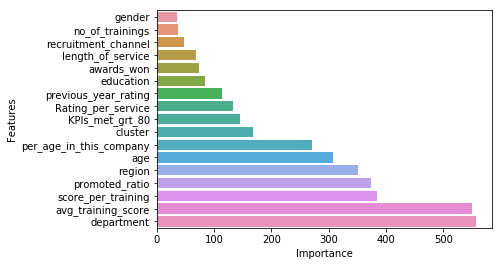

In [56]:
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          #'metric': 'binary_logloss',
          'num_leaves': 16,
          'max_depth' : 4,
          'learning_rate': 0.09,
          'feature_fraction': 0.8,
          'bagging_fraction': 1,
          #'bagging_freq': 5,
          'verbose': 1
         }

nrounds = int(215/0.8)

lg = lgb.train(params,
               lgb_train_prod,
               num_boost_round =  nrounds,
               verbose_eval = 10)

lgb_predict = lg.predict(test_prod_X)
lgb_predict = (lgb_predict > 0.3).astype(int)


sub_LGB = pd.DataFrame({'employee_id' : sub_id,
                        'is_promoted' : lgb_predict})

sub_LGB.to_csv('sub_LGB_8.csv', index = False)

lgb_imt = pd.DataFrame({'Features' : indep, 
                        'Importance' : lg.feature_importance()}).sort_values(['Importance'])

plt.figure()
#plt.barh(F_impt.indep, F_impt.importance, order = F_impt['importance'])
sns.barplot(lgb_imt.Importance, lgb_imt.Features)
plt.show()
